## Cohort1: Survival vs. Death

- data loading

In [ ]:
import pandas as pd
import numpy as np

df_albumin_clean = pd.read_excel('/home/mailiyi/Poisoning_Prediction/all_poisoning_data_wide_clean_albumin_20251106.xlsx')

features_categorical = ['Gender',
 'Education Level',
 'Type of Poisoning',
 'Hypertension',
 'Hyperlipidemia',
 'Diabetes Mellitus',
 'Cerebrovascular Disease',
 'Heart Disease',
 'Allergy History',
 'Cancer',
 'Poisoning',
 'degree of poisoning',
 'Smoking Status',
 'Alcohol Consumption Status',
 'Shortness of Breath',
 'Chest Pain',
 'Cough',
 'Pre-syncope',
 'Altered Consciousness or Syncope',
 'Sore Throat',
 'Fever',
 'Fatigue',
 'Lower Limb Edema',
 'Palpitations',
 'Vomiting',
 'Nausea',
 'Weakness',
 'Headache',
 'Residence']

value_mappings_en = {
    "Gender": {
        1: "Male",
        0: "Female"
    },
    "Education Level": {
        1: "Illiterate",
        2: "Primary School",
        3: "Junior High School",
        4: "Senior High School",
        5: "University Degree"
    },
    "Type of Poisoning": {
        1: "Industrial",
        2: "Pharmaceutical",
        3: "Pesticide",
        4: "Alcohol",
        0: "Uncertain"
    },
    "Hypertension": {
        1: "Yes",
        0: "No"
    },
    "Hyperlipidemia": {
        1: "Yes",
        0: "No"
    },
    "Diabetes Mellitus": {
        1: "Yes",
        0: "No"
    },
    "Cerebrovascular Disease": {
        1: "Yes",
        0: "No"
    },
    "Heart Disease": {
        1: "Yes",
        0: "No"
    },
    "Allergy History": {
        1: "Yes",
        0: "No"
    },
    "Cancer": {
        1: "Yes",
        0: "No"
    },
    "Poisoning": {
        1: "Yes",
        0: "No"
    },
    "degree of poisoning": {
        0: "Undetermined",
        1: "Low",
        2: "Moderate",
        3: "High"
    },
    "Smoking": {
        1: "Yes",
        0: "No"
    },
    "Alcohol Consumption Status": {
        1: "Yes",
        0: "No"
    },
    "Shortness of Breath": {
        1: "Yes",
        0: "No"
    },
    "Chest Pain": {
        1: "Yes",
        0: "No"
    },
    "Cough": {
        1: "Yes",
        0: "No"
    },
    "Pre-syncope": {
        1: "Yes",
        0: "No"
    },
    "Altered Mental Status or Syncope(AMS or Sync)": {
        1: "Yes",
        0: "No"
    },
    "Sore Throat": {
        1: "Yes",
        0: "No"
    },
    "Fever": {
        1: "Yes",
        0: "No"
    },
    "Fatigue": {
        1: "Yes",
        0: "No"
    },
    "Lower Limb Edema": {
        1: "Yes",
        0: "No"
    },
    "Palpitations": {
        1: "Yes",
        0: "No"
    },
    "Vomiting": {
        1: "Yes",
        0: "No"
    },
    "Nausea": {
        1: "Yes",
        0: "No"
    },
    "Weakness": {
        1: "Yes",
        0: "No"
    },
    "Headache": {
        1: "Yes",
        0: "No"
    },
    "Residence": {
        1: "Rural",
        2: "Urban"
    },
    "Smoking Status": {
        1: "Yes",
        0: "No"
    },
    'Altered Consciousness or Syncope': {
        1: "Yes",
        0: "No"
    },    
}


## Inverse mapping (English label → numerical value)
df_mapped_wide = df_albumin_clean.copy()
for col in features_categorical:
    if col in value_mappings_en and col in df_mapped_wide.columns:
        inv_map = {v: k for k, v in value_mappings_en[col].items()}
        df_mapped_wide[col] = df_mapped_wide[col].map(inv_map)



In [ ]:
# Store the distribution of each categorical variable (for later analysis or printing)
category_distributions = {}

for col in features_categorical:
    if col in df_mapped_wide.columns:
        counts = df_mapped_wide[col].value_counts(dropna=False)  # dropna=False 可显示 NaN 的数量（如有）
        category_distributions[col] = counts
        print(counts)

In [ ]:
# Statistics Distribution of Outcome_other and Outcome
print(df_mapped_wide["Outcome_other"].value_counts(dropna=False))
print(df_mapped_wide["Outcome"].value_counts(dropna=False))

In [ ]:
features_continuous = ['Age',
 'Length of Stay',
 'Weight',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Respiratory Rate',
 'Heart Rate',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hemoglobin Concentration',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Platelet Count',
 'Mean Platelet Volume',
 'Alanine Aminotransferase (ALT)',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Lactate Dehydrogenase (LDH)',
 'Urea',
 'Serum Creatinine',
 'Uric Acid',
 'Creatine Kinase (CK)',
 'Creatine Kinase-MB Isoenzyme',
 'Troponin I',
 'High-Sensitivity C-Reactive Protein (hs-CRP)',
 'Homocysteine',
 'Potassium',
 'Sodium',
 'Chloride',
 'Carbon Dioxide',
 'Prothrombin Time',
 'D-Dimer',
 'Lactate',
 'Blood Cholinesterase Test Results',
 'Albumin (First Measurement)',
 'Albumin (Last Measurement)',
 'Number of Hemoperfusion Sessions',
 'Number of Blood Purification Sessions',
 'Hyperbaric Oxygen Therapy Duration and Frequency',
 'Atropine Dosage',
 'Long-acting Nitroglycerin Dosage',
 'Pralidoxime Dosage',
 ]  ## 去掉含increasing的特征

In [ ]:
## Calculate missing proportions for continuous variables

missing_ratios = df_mapped_wide[features_continuous].isnull().mean()

missing_summary = (missing_ratios * 100).round(2).sort_values(ascending=False)
print(missing_summary)

变量缺失比例（%）:
Lactate                                             96.81
Carbon Dioxide                                      94.95
Potassium                                           94.75
Sodium                                              94.75
Chloride                                            94.75
Prothrombin Time                                    94.64
D-Dimer                                             94.64
Atropine Dosage                                     93.92
Long-acting Nitroglycerin Dosage                    92.48
Hyperbaric Oxygen Therapy Duration and Frequency    92.38
Pralidoxime Dosage                                  92.17
Serum Creatinine                                    89.70
Blood Cholinesterase Test Results                   89.29
Number of Blood Purification Sessions               84.55
Number of Hemoperfusion Sessions                    84.04
Homocysteine                                        62.20
Systolic Blood Pressure                             54.89
Dia

In [ ]:

# Feature names screened for deletion rates> 90%
high_missing_features = missing_ratios[missing_ratios > 0.90].index.tolist()
for feat in high_missing_features:
    print(f"{feat}: {missing_ratios[feat]*100:.2f}%")


缺失率 > 90% 的连续变量:
Potassium: 94.75%
Sodium: 94.75%
Chloride: 94.75%
Carbon Dioxide: 94.95%
Prothrombin Time: 94.64%
D-Dimer: 94.64%
Lactate: 96.81%
Hyperbaric Oxygen Therapy Duration and Frequency: 92.38%
Atropine Dosage: 93.92%
Long-acting Nitroglycerin Dosage: 92.48%
Pralidoxime Dosage: 92.17%


In [ ]:

print(len(features_continuous))
print(len(high_missing_features))
features_continuous = [feat for feat in features_continuous if feat not in high_missing_features]
print(len(features_continuous))

# df2 Remove variables from high_missing_features
df_mapped_wide = df_mapped_wide.drop(columns=high_missing_features)
print(df_mapped_wide.shape)

print('number of features：',len(features_categorical + features_continuous))


43
11
32
(971, 95)


## 1. Select the best model (5CV) and draw a shap diagram

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from catboost import CatBoostClassifier, Pool
import shap
import matplotlib.pyplot as plt

# ===================== bootstrap calculation function =====================
def bootstrap_metric_ci(y_true, y_pred, metric_fn, n_bootstrap=2000, seed=42):
    rng = np.random.RandomState(seed)
    scores = []
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    for _ in range(n_bootstrap):
        idx = rng.randint(0, len(y_true), len(y_true))
        if len(np.unique(y_true[idx])) < 2:
            continue
        scores.append(metric_fn(y_true[idx], y_pred[idx]))
    return np.mean(scores), np.percentile(scores, 2.5), np.percentile(scores, 97.5)


# ===================== 5-fold CatBoost + SHAP a complete function =====================
def train_catboost_5fold_cv_fixed_shap(
    dataX,
    dataY,
    cat_features=None,
    save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death/',
    seed=9762,
    early_stopping_rounds=30,
    params={'depth': 5, 'iterations': 200, 'learning_rate': 0.05},
    # SHAP / plotting control
    fig_title = 'a1. Feature impact (Task 1)',
    max_display=15,
    x_fontsize=12,
    xtick_fontsize=10,
    ytick_fontsize=10,
    colorbar_fontsize=10
):
    """
    Returns a dict with results, model, SHAP importance dataframe, and file paths.
    """
    os.makedirs(save_path, exist_ok=True)
    dataX = dataX.copy()
    if cat_features is not None:
        for c in cat_features:
            dataX[c] = dataX[c].astype(str).fillna("missing")
    X = dataX
    y = np.array(dataY)
    # directory for this param set
    param_name = "_".join([f"{k}_{v}" for k, v in params.items()])
    param_path = os.path.join(save_path, param_name)
    os.makedirs(param_path, exist_ok=True)
    print(f"save directory: {param_path}")

    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    all_results = []
    fold_metrics = []
    models = []

    fold_idx = 1
    for train_val_index, test_index in kf.split(X):
        # Train/val/test segmentation
        X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
        y_train_val, y_test = y[train_val_index], y[test_index]

        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val,
            test_size=1/8, random_state=seed, stratify=y_train_val
        )

        print(f"\nSeed {seed}, Fold={fold_idx}: Train={len(y_train)}, Val={len(y_val)}, Test={len(y_test)}")
        num_pos = np.sum(y_train == 1)
        num_neg = np.sum(y_train == 0)
        scale_pos_weight = num_neg / max(num_pos, 1)
        train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
        val_pool = Pool(X_val, label=y_val, cat_features=cat_features)
        test_pool = Pool(X_test, label=y_test, cat_features=cat_features)

        model = CatBoostClassifier(
            **params,
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            random_seed=seed,
            verbose=False
        )

        model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=early_stopping_rounds, verbose=False)

        y_pred_prob = model.predict_proba(test_pool)[:, 1]
        auroc = metrics.roc_auc_score(y_test, y_pred_prob)
        print(f"Fold {fold_idx} AUROC = {auroc:.4f}")

        fold_metrics.append(auroc)
        models.append(model)

        fold_df = pd.DataFrame({
            "fold": fold_idx,
            "y_test": y_test,
            "y_pred": y_pred_prob
        })
        fold_df.to_csv(os.path.join(param_path, f"fold_{fold_idx}_results.csv"), index=False)
        all_results.append(fold_df)

        fold_idx += 1

    all_results_df = pd.concat(all_results, ignore_index=True)
    all_results_csv = os.path.join(param_path, "all_folds_results.csv")
    all_results_df.to_csv(all_results_csv, index=False)

    # bootstrap AUROC/AUPRC
    mean_auroc, auroc_lower, auroc_upper = bootstrap_metric_ci(
        all_results_df["y_test"], all_results_df["y_pred"], metrics.roc_auc_score
    )
    mean_auprc, auprc_lower, auprc_upper = bootstrap_metric_ci(
        all_results_df["y_test"], all_results_df["y_pred"], metrics.average_precision_score
    )

    print(f"AUROC: Mean={mean_auroc:.4f}, 95% CI=({auroc_lower:.4f}, {auroc_upper:.4f})")
    print(f"AUPRC: Mean={mean_auprc:.4f}, 95% CI=({auprc_lower:.4f}, {auprc_upper:.4f})")

    # ===================== optimal model selection =====================
    best_fold = int(np.argmax(fold_metrics))
    best_model = models[best_fold]
    print(f"\n===== Fold {best_fold + 1}, AUROC={fold_metrics[best_fold]:.4f} =====")

    # ===================== SHAP（Use the whole sample） =====================
    # TreeExplainer(best_model) then call explainer(X) to get Explanation object (works with shap v0.48.0)
    explainer = shap.TreeExplainer(best_model)
    shap_expl = explainer(X)   # shap.Explanation object
    # raw values (ndarray) for saving / computing importance
    shap_values = shap_expl.values   # shape (n_samples, n_features)

    shap_save_csv = os.path.join(param_path, f"best_fold_{best_fold+1}_all_patients_shap_values.csv")
    shap_df = pd.DataFrame(shap_values, columns=X.columns)
    shap_df.insert(0, "PatientIndex", X.index.values)
    shap_df.to_csv(shap_save_csv, index=False)

    shap_save_npy = os.path.join(param_path, f"best_fold_{best_fold+1}_all_patients_shap_values.npy")
    np.save(shap_save_npy, shap_values)
    print(f"Saved SHAP CSV: {shap_save_csv}")
    print(f"Saved SHAP NPY: {shap_save_npy}")

    # ===================== Calculate Feature Importance（Mean |SHAP|） =====================
    shap_importance = np.abs(shap_values).mean(axis=0)
    shap_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "MeanAbsSHAP": shap_importance
    }).sort_values("MeanAbsSHAP", ascending=False)

    shap_imp_csv = os.path.join(param_path, f"best_fold_{best_fold+1}_shap_importance.csv")
    shap_importance_df.to_csv(shap_imp_csv, index=False)

    # ===================== SHAP Beeswarm（Top max_display） =====================
    top_n = int(max_display)
    top_features = shap_importance_df["Feature"].head(top_n).values
    top_idx = [X.columns.get_loc(f) for f in top_features]

    # 为 beeswarm 构造 Explanation 子对象（values、base_values、data、feature_names）
    # base_values 在 shap_expl.base_values 可能是标量或数组（n_samples），都可以直接传入
    # small_expl = shap.Explanation(
    #     values=shap_expl.values[:, top_idx],
    #     base_values=shap_expl.base_values,
    #     data=X[top_features].values,
    #     feature_names=list(top_features)
    # )

    rename_dict = { 
    'degree of poisoning':'Degree of poisoning',
    'Altered Consciousness or Syncope': 'AMS or Sync',
    'White Blood Cell Count': 'WBC',
    'Red Blood Cell Count': 'RBC',
    'Hemoglobin Concentration': 'HGB',
    'Mean Corpuscular Volume': 'MCV',
    'Mean Corpuscular Hemoglobin': 'MCH',
    'Mean Corpuscular Hemoglobin Concentration': 'MCHC',
    'Alanine Aminotransferase (ALT)': 'ALT',
    'Lactate Dehydrogenase (LDH)': 'LDH',
    'Creatine Kinase (CK)': 'Creatine Kinase',
    'Creatine Kinase-MB Isoenzyme': 'CK-MB',
    'High-Sensitivity C-Reactive Protein (hs-CRP)': 'hs-CRP',
    'Blood Cholinesterase Test Results': 'Cholinesterase',
    'Number of Hemoperfusion Sessions': 'Hemoperfusion Count',
    'Number of Blood Purification Sessions': 'Blood Purification Count',
    'Albumin (First Measurement)':'Albumin (First)',
    'Albumin (Last Measurement)':'Albumin (Last)',
}

    top_features_display = [rename_dict.get(f, f) for f in top_features]
    small_expl = shap.Explanation(
        values=shap_expl.values[:, top_idx],
        base_values=shap_expl.base_values,
        data=X[top_features].values,
        feature_names=top_features_display
    )

    # plt.figure(figsize=(4, 5))
    plt.figure()
    shap.plots.beeswarm(
        small_expl,
        max_display=top_n,
        show=False,
        color=plt.get_cmap("cool"),
        plot_size=(4, 5)
    )
    ax = plt.gca()
    ax.set_xlabel("SHAP value", fontsize=x_fontsize)
    ax.tick_params(axis='x', labelsize=xtick_fontsize)
    ax.tick_params(axis='y', labelsize=ytick_fontsize)
    ax.set_title(fig_title, fontsize=max(12, x_fontsize+1), pad=15)  # pad 控制距离
 
    # # 调整字体大小
    # ax = plt.gca()
    # ax.tick_params(axis='x', labelsize=xtick_fontsize)
    # ax.tick_params(axis='y', labelsize=ytick_fontsize)
    # plt.xlabel("SHAP value", fontsize=x_fontsize)
    # plt.title(f"Top {top_n} SHAP Beeswarm (Best Fold {best_fold + 1})", fontsize=max(12, x_fontsize+1))

    try:
        axes = plt.gcf().axes
        if len(axes) > 1:
            cbar_ax = axes[-1]
            cbar_ax.tick_params(labelsize=colorbar_fontsize)
    except Exception:
        pass

    plt.tight_layout()
    beeswarm_png = os.path.join(param_path, f"best_fold_{best_fold+1}_shap_beeswarm_top{top_n}.png")
    plt.savefig(beeswarm_png, dpi=300)
    plt.close()
    print(f"Saved beeswarm plot: {beeswarm_png}")

    # # ===================== Top N Bar Plot（Mean |SHAP|） =====================
    # plt.figure(figsize=(8, 6))
    # topn_df = shap_importance_df.head(top_n)[::-1] 
    # plt.barh(topn_df["Feature"], topn_df["MeanAbsSHAP"])
    # plt.xlabel("Mean(|SHAP Value|)", fontsize=x_fontsize)
    # plt.xticks(fontsize=xtick_fontsize)
    # plt.yticks(fontsize=ytick_fontsize)
    # plt.title(f"Top {top_n} SHAP Feature Importance (Best Fold {best_fold + 1})", fontsize=max(12, x_fontsize+2))
    # plt.tight_layout()
    # bar_png = os.path.join(param_path, f"best_fold_{best_fold+1}_shap_bar_top{top_n}.png")
    # plt.savefig(bar_png, dpi=300)
    # plt.close()
    # print(f"Saved bar plot: {bar_png}")

    # print(f"All saved to: {param_path}")

    return {
        "params": params,
        "AUROC_mean": mean_auroc,
        "AUROC_CI": (auroc_lower, auroc_upper),
        "AUPRC_mean": mean_auprc,
        "AUPRC_CI": (auprc_lower, auprc_upper),
        "AllResultsCSV": all_results_csv,
        "PerFoldResultsDir": param_path,
        "BestFold": best_fold + 1,
        "BestModel": best_model,
        "SHAPImportanceCSV": shap_imp_csv,
        "AllPatientsSHAP_CSV": shap_save_csv,
        "AllPatientsSHAP_NPY": shap_save_npy,
        "BeeswarmPNG": beeswarm_png,
        # "BarPNG": bar_png
    }



/home/mailiyi/.conda/envs/ml_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
df_mapped_wide['Outcome_other'].value_counts()

Outcome_other
0    889
1     82
Name: count, dtype: int64

In [ ]:
dataX = df_mapped_wide[features_categorical + features_continuous]
dataY = df_mapped_wide['Outcome_other']
results = train_catboost_5fold_cv_fixed_shap(dataX, dataY, cat_features=features_categorical, save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death/')
# results = train_catboost_5fold_cv_fixed_shap(dataX, dataY,save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death/')
print(results)


===== 使用固定参数: {'depth': 5, 'iterations': 200, 'learning_rate': 0.05} =====
保存目录: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death/depth_5_iterations_200_learning_rate_0.05

Seed 9762, Fold=1: Train=679, Val=97, Test=195
Fold 1 AUROC = 0.8177

Seed 9762, Fold=2: Train=679, Val=98, Test=194
Fold 2 AUROC = 0.8968

Seed 9762, Fold=3: Train=679, Val=98, Test=194
Fold 3 AUROC = 0.8793

Seed 9762, Fold=4: Train=679, Val=98, Test=194
Fold 4 AUROC = 0.8880

Seed 9762, Fold=5: Train=679, Val=98, Test=194
Fold 5 AUROC = 0.8052

===== 最终结果 (固定参数) =====
AUROC: Mean=0.8538, 95% CI=(0.8081, 0.8959)
AUPRC: Mean=0.4668, 95% CI=(0.3609, 0.5686)

===== 最优模型来自 Fold 2, AUROC=0.8968 =====
计算 SHAP Explanation（使用全体样本）...
保存所有患者所有特征的 SHAP values ...
Saved SHAP CSV: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death/depth_5_iterations_200_learning_rate_0.05/best_fold_2_all_patients_shap_values.csv
Saved SHAP NPY: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death/depth_5_iter

## 2. Statistical results of stability of SHAP between 5-folds (Kruskal-Wallis test)

In [ ]:
import os   
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from catboost import CatBoostClassifier, Pool
import shap
from scipy.stats import kruskal

# ===================== bootstrap calculate the mean value CI =====================
def bootstrap_ci(data, n_bootstrap=2000, alpha=0.05, seed=42):
    rng = np.random.RandomState(seed)
    data = np.array(data)
    means = []
    for _ in range(n_bootstrap):
        sample = rng.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, 100*alpha/2)
    upper = np.percentile(means, 100*(1-alpha/2))
    return np.mean(data), lower, upper

# ===================== 5-fold CatBoost + SHAP + Top-k Stability =====================
def train_catboost_5fold_cv_shap_stats_stability(
    dataX,
    dataY,
    cat_features=None,
    save_path='./shap_stability/',
    seed=9762,
    early_stopping_rounds=30,
    params={'depth': 5, 'iterations': 200, 'learning_rate': 0.05},
    top_k=10,
):
    """
    Train CatBoost 5 fold cross-validation, calculate SHAP values for each fold, and save:
      1. Forecast results CSV per fold
      2. SHAP values per fold CSV (all patients)
      3. Average absolute SHAP CSV per fold feature
      4. SHAP values for all patients (optimal model)
      5. Feature SHAP Mean(Q1,Q3) + Kruskal-Wallis test
      6. Top-k Characteristic Stability CSV
    """
    os.makedirs(save_path, exist_ok=True)
    X = dataX.copy()
    y = np.array(dataY)
    if cat_features is not None:
        for c in cat_features:
            X[c] = X[c].astype(str).fillna("missing")
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    all_results = []
    fold_metrics = []
    models = []
    all_fold_shap = []
    fold_idx = 1
    for train_val_index, test_index in kf.split(X):
        X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
        y_train_val, y_test = y[train_val_index], y[test_index]

        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val,
            test_size=1/8, random_state=seed, stratify=y_train_val
        )
        print(f"\nSeed {seed}, Fold={fold_idx}: Train={len(y_train)}, Val={len(y_val)}, Test={len(y_test)}")
        scale_pos_weight = np.sum(y_train==0) / max(np.sum(y_train==1),1)
        train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
        val_pool = Pool(X_val, label=y_val, cat_features=cat_features)
        test_pool = Pool(X_test, label=y_test, cat_features=cat_features)
        model = CatBoostClassifier(
            **params,
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            random_seed=seed,
            verbose=False
        )
        model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=early_stopping_rounds, verbose=False)
        y_pred_prob = model.predict_proba(test_pool)[:, 1]
        auroc = metrics.roc_auc_score(y_test, y_pred_prob)
        print(f"Fold {fold_idx} AUROC = {auroc:.4f}")
        fold_metrics.append(auroc)
        models.append(model)

        fold_df = pd.DataFrame({
            "fold": fold_idx,
            "y_test": y_test,
            "y_pred": y_pred_prob
        })
        fold_df.to_csv(os.path.join(save_path, f"fold_{fold_idx}_results.csv"), index=False)
        all_results.append(fold_df)

        # ===================== Save each fold SHAP (Total X) =====================
        explainer = shap.TreeExplainer(model)
        shap_values_fold = explainer(X).values
        all_fold_shap.append(shap_values_fold)

        fold_shap_df = pd.DataFrame(shap_values_fold, columns=X.columns)
        fold_shap_df.insert(0, "PatientIndex", X.index.values)
        fold_shap_csv = os.path.join(save_path, f"fold_{fold_idx}_shap_values.csv")
        fold_shap_df.to_csv(fold_shap_csv, index=False)

        fold_mean_abs = pd.DataFrame({
            "Feature": X.columns,
            "Fold_MeanAbsSHAP": np.abs(shap_values_fold).mean(axis=0)
        }).sort_values("Fold_MeanAbsSHAP", ascending=False)
        fold_mean_abs_csv = os.path.join(save_path, f"fold_{fold_idx}_feature_mean_abs_shap.csv")
        fold_mean_abs.to_csv(fold_mean_abs_csv, index=False)
        fold_idx += 1

    # ===================== Combine all the forecast results =====================
    all_results_df = pd.concat(all_results, ignore_index=True)
    all_results_csv = os.path.join(save_path, "all_folds_results.csv")
    all_results_df.to_csv(all_results_csv, index=False)

    # ===================== bootstrap AUROC/AUPRC =====================
    mean_auroc, auroc_lower, auroc_upper = bootstrap_ci(all_results_df["y_pred"])
    mean_auprc, auprc_lower, auprc_upper = bootstrap_ci(all_results_df["y_pred"])

    best_fold = int(np.argmax(fold_metrics))
    best_model = models[best_fold]
    print(f"\n===== Fold {best_fold + 1}, AUROC={fold_metrics[best_fold]:.4f} =====")

    # ===================== Save SHAP values for all patients (optimal model) =====================
    shap_values_all = shap.TreeExplainer(best_model)(X).values
    shap_save_csv = os.path.join(save_path, f"best_fold_{best_fold+1}_all_patients_shap_values.csv")
    shap_df = pd.DataFrame(shap_values_all, columns=X.columns)
    shap_df.insert(0, "PatientIndex", X.index.values)
    shap_df.to_csv(shap_save_csv, index=False)

    shap_save_npy = os.path.join(save_path, f"best_fold_{best_fold+1}_all_patients_shap_values.npy")
    np.save(shap_save_npy, shap_values_all)
    print(f"Saved all patients SHAP values to CSV and NPY")

    # ===================== Calculate the five-fold Mean (Q1,Q3) + Kruskal-Wallis for each feature ===================== 
    best_shap = np.abs(all_fold_shap[best_fold]).mean(axis=0)
    feature_order = np.argsort(best_shap)[::-1]
    sorted_features = X.columns[feature_order]
    feature_stats = []
    n_folds = len(all_fold_shap)
    for feat in sorted_features:
        i = list(X.columns).index(feat)
        fold_vals = [fold[:, i] for fold in all_fold_shap]

        # Mean ± Q1/Q3 (absolute)
        fold_means_formatted = []
        for fv in fold_vals:
            abs_fv = np.abs(fv)
            mean_val = np.mean(abs_fv)
            q1 = np.percentile(abs_fv, 25)
            q3 = np.percentile(abs_fv, 75)
            fold_means_formatted.append(f"{mean_val:.6f} ({q1:.6f}, {q3:.6f})")

        # Kruskal-Wallis test
        try:
            stat, p = kruskal(*fold_vals)
        except ValueError:
            stat, p = np.nan, 1.0

        feature_stats.append({
            "Feature": feat,
            "KRUSKAL_W": stat,
            "p_value": p,
            "Fold1_SHAP": fold_means_formatted[0],
            "Fold2_SHAP": fold_means_formatted[1],
            "Fold3_SHAP": fold_means_formatted[2],
            "Fold4_SHAP": fold_means_formatted[3],
            "Fold5_SHAP": fold_means_formatted[4],
        })

    feature_stats_df = pd.DataFrame(feature_stats)
    feature_stats_csv = os.path.join(save_path, "feature_shap_meanIQR_stability.csv")
    feature_stats_df.to_csv(feature_stats_csv, index=False)
    print(f"Saved feature SHAP per-fold Mean (Q1,Q3) + Kruskal-Wallis to {feature_stats_csv}")

    # ===================== Top-k feature stability statistics (including mean per fold & normalization) =====================
    topk_counts = {feat: 0 for feat in X.columns}

    fold_mean_abs_dict = {feat: [] for feat in X.columns}
    fold_mean_abs_norm_dict = {feat: [] for feat in X.columns}

    for fold_shap in all_fold_shap:
        fold_mean_abs = np.abs(fold_shap).mean(axis=0)
        fold_mean_abs_norm = fold_mean_abs / fold_mean_abs.sum()
        for idx, feat in enumerate(X.columns):
            fold_mean_abs_dict[feat].append(fold_mean_abs[idx])
            fold_mean_abs_norm_dict[feat].append(fold_mean_abs_norm[idx])
        
        top_features_idx = np.argsort(fold_mean_abs)[::-1][:top_k]
        top_feats = X.columns[top_features_idx]
        for feat in top_feats:
            topk_counts[feat] += 1

    topk_df = pd.DataFrame({
        "Feature": list(X.columns),
        f"Top{top_k}_Count": [topk_counts[feat] for feat in X.columns],
        "Fold1_MeanAbsSHAP": [fold_mean_abs_dict[feat][0] for feat in X.columns],
        "Fold2_MeanAbsSHAP": [fold_mean_abs_dict[feat][1] for feat in X.columns],
        "Fold3_MeanAbsSHAP": [fold_mean_abs_dict[feat][2] for feat in X.columns],
        "Fold4_MeanAbsSHAP": [fold_mean_abs_dict[feat][3] for feat in X.columns],
        "Fold5_MeanAbsSHAP": [fold_mean_abs_dict[feat][4] for feat in X.columns],
        "Fold1_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][0] for feat in X.columns],
        "Fold2_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][1] for feat in X.columns],
        "Fold3_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][2] for feat in X.columns],
        "Fold4_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][3] for feat in X.columns],
        "Fold5_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][4] for feat in X.columns],
    })

    topk_df = topk_df.sort_values(f"Top{top_k}_Count", ascending=False)
    topk_csv = os.path.join(save_path, f"feature_top{top_k}_stability.csv")
    topk_df.to_csv(topk_csv, index=False)
    print(f"Saved Top-{top_k} feature stability counts with mean(abs) and normalized values to {topk_csv}")

    return {
        "params": params,
        "AUROC_mean": mean_auroc,
        "AUROC_CI": (auroc_lower, auroc_upper),
        "AUPRC_mean": mean_auprc,
        "AUPRC_CI": (auprc_lower, auprc_upper),
        "AllResultsCSV": all_results_csv,
        "PerFoldResultsDir": save_path,
        "BestFold": best_fold + 1,
        "BestModel": best_model,
        "AllPatientsSHAP_CSV": shap_save_csv,
        "AllPatientsSHAP_NPY": shap_save_npy,
        "FeatureSHAPStatsCSV": feature_stats_csv,
        "TopKFeatureStabilityCSV": topk_csv
    }


In [ ]:

dataX = df_mapped_wide[features_categorical + features_continuous]
dataY = df_mapped_wide['Outcome_other']
results = train_catboost_5fold_cv_shap_stats_stability(dataX, dataY, cat_features=features_categorical, save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_stability analyses/')
# results = train_catboost_5fold_cv_shap_stats_stability(dataX, dataY,save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_stability analyses/')
print(results)



Seed 9762, Fold=1: Train=679, Val=97, Test=195
Fold 1 AUROC = 0.8177

Seed 9762, Fold=2: Train=679, Val=98, Test=194
Fold 2 AUROC = 0.8968

Seed 9762, Fold=3: Train=679, Val=98, Test=194
Fold 3 AUROC = 0.8793

Seed 9762, Fold=4: Train=679, Val=98, Test=194
Fold 4 AUROC = 0.8880

Seed 9762, Fold=5: Train=679, Val=98, Test=194
Fold 5 AUROC = 0.8052

===== 最优模型来自 Fold 2, AUROC=0.8968 =====
Saved all patients SHAP values to CSV and NPY
Saved feature SHAP per-fold Mean (Q1,Q3) + Kruskal-Wallis to /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_stability analyses/feature_shap_meanIQR_stability.csv
Saved Top-10 feature stability counts with mean(abs) and normalized values to /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_stability analyses/feature_top10_stability.csv
{'params': {'depth': 5, 'iterations': 200, 'learning_rate': 0.05}, 'AUROC_mean': np.float64(0.3836577603827592), 'AUROC_CI': (np.float64(0.375601348863326), np.float64(0.3919145962347474)), 'AUPRC_me

In [ ]:
### mean(abs)[Q1,Q3]
## Calculation method of shap value of each fold: calculate the shap value of the whole X with the corresponding model
## Kruskal-Wallis: Compare the difference in the shap distribution of each fold across the population

import pandas as pd
feature_shap_analyses = pd.read_csv('/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_stability analyses/feature_shap_meanIQR_stability.csv')
feature_shap_analyses.head(5)

### TOP 10 Number of occurrences
feature_topk_count = pd.read_csv('/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_stability analyses/feature_top10_stability.csv')
feature_topk_count.head(10) 

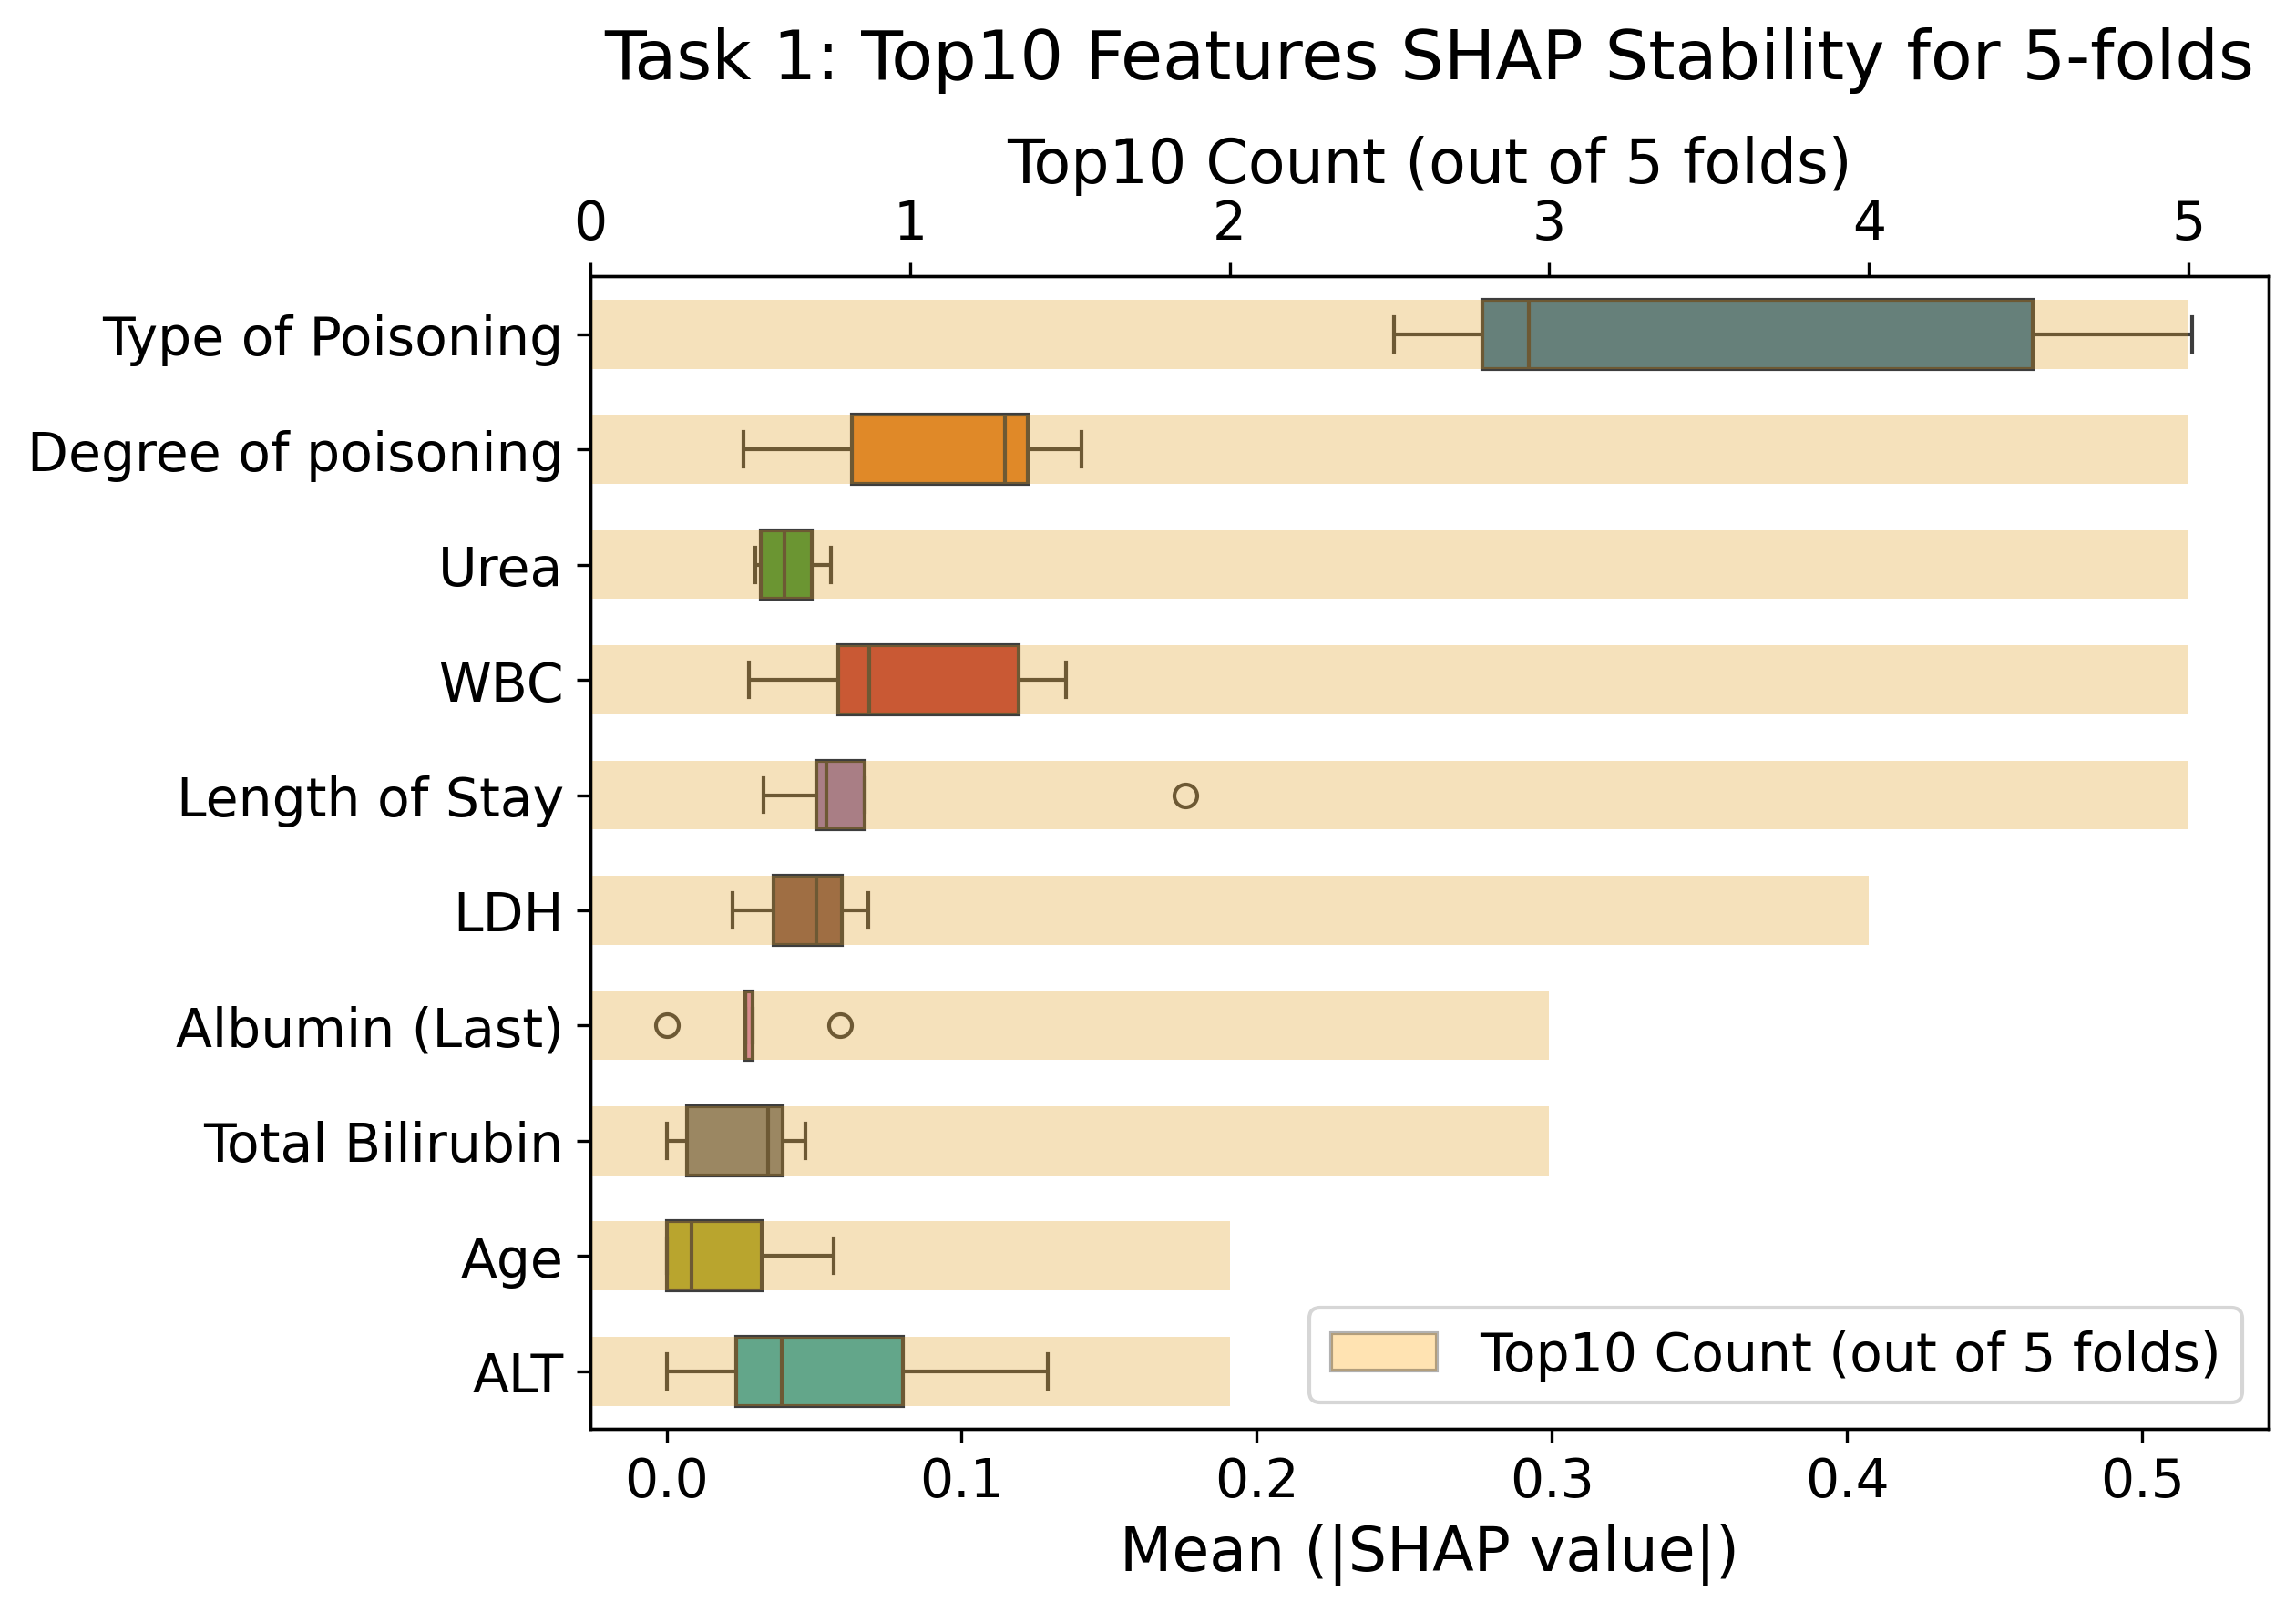

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

name = 'Task 1'

rename_dict = { 
    'degree of poisoning':'Degree of poisoning',
    'Altered Consciousness or Syncope': 'AMS or Sync',
    'White Blood Cell Count': 'WBC',
    'Red Blood Cell Count': 'RBC',
    'Hemoglobin Concentration': 'HGB',
    'Mean Corpuscular Volume': 'MCV',
    'Mean Corpuscular Hemoglobin': 'MCH',
    'Mean Corpuscular Hemoglobin Concentration': 'MCHC',
    'Alanine Aminotransferase (ALT)': 'ALT',
    'Lactate Dehydrogenase (LDH)': 'LDH',
    'Creatine Kinase (CK)': 'Creatine Kinase',
    'Creatine Kinase-MB Isoenzyme': 'CK-MB',
    'High-Sensitivity C-Reactive Protein (hs-CRP)': 'hs-CRP',
    'Blood Cholinesterase Test Results': 'Cholinesterase',
    'Number of Hemoperfusion Sessions': 'Hemoperfusion Count',
    'Number of Blood Purification Sessions': 'Blood Purification Count',
    'Albumin (First Measurement)':'Albumin (First)',
    'Albumin (Last Measurement)':'Albumin (Last)',
}

feature_topk_df = pd.read_csv('/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_stability analyses/feature_top10_stability.csv')

top10_features = feature_topk_df.sort_values("Top10_Count", ascending=False).head(10)
top10_features['Feature_Rename'] = top10_features['Feature'].map(rename_dict).fillna(top10_features['Feature'])

# ===================== plot =====================
plt.figure(figsize=(8.5, 6),dpi=300)

# Boxplot: per fold mean(abs) SHAP
fold_cols = ["Fold1_MeanAbsSHAP","Fold2_MeanAbsSHAP","Fold3_MeanAbsSHAP","Fold4_MeanAbsSHAP","Fold5_MeanAbsSHAP"]
box_data = top10_features[fold_cols].values.T

# horizontal boxplot
sns.boxplot(data=box_data, orient='h', width=0.6)
# plt.yticks(range(len(top10_features)), top10_features["Feature"], fontsize=14)
plt.yticks(range(len(top10_features)), top10_features["Feature_Rename"], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Mean (|SHAP value|)", fontsize=16)
plt.title(f"{name}: Top10 Features SHAP Stability for 5-folds", fontsize=18, pad=15)

# Add horizontal histogram：Top10_Count
ax2 = plt.twiny()
sns.barplot(y=range(len(top10_features)), x=top10_features["Top10_Count"], 
            alpha=0.3, color="orange", ax=ax2, orient='h', width=0.6)
ax2.set_xlabel("Top10 Count (out of 5 folds)", fontsize=16)
ax2.tick_params(axis='x', labelsize=14)

# ===================== Add bar legend only =====================
bar_legend = Patch(facecolor='orange', edgecolor='black', alpha=0.3, label='Top10 Count (out of 5 folds)')
plt.legend(handles=[bar_legend], loc='lower right', fontsize=14)

plt.tight_layout()
plt.show()


## 3. Personalized SHAP

- PatientIndex uses the value of Hospital ID, and all results are added with Hospital ID

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from catboost import CatBoostClassifier, Pool
import shap
import matplotlib.pyplot as plt

# ===================== bootstrap calculation function =====================
def bootstrap_metric_ci(y_true, y_pred, metric_fn, n_bootstrap=2000, seed=42):
    rng = np.random.RandomState(seed)
    scores = []
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    for _ in range(n_bootstrap):
        idx = rng.randint(0, len(y_true), len(y_true))
        if len(np.unique(y_true[idx])) < 2:
            continue
        scores.append(metric_fn(y_true[idx], y_pred[idx]))
    return np.mean(scores), np.percentile(scores, 2.5), np.percentile(scores, 97.5)

def train_catboost_5fold_cv_shap_withID(
    dataX,
    dataY,
    cat_features=None,
    save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_for_LLM/raw_shap_results_withID/',
    seed=9762,
    early_stopping_rounds=30,
    params={'depth': 5, 'iterations': 200, 'learning_rate': 0.05},
    max_display=15
):
    """
    Returns a dict with results, model, SHAP importance dataframe, and file paths.
    No plotting, CSVs only. PatientIndex replaced by HospitalID.
    """
    os.makedirs(save_path, exist_ok=True)
    dataX = dataX.copy()
    if 'Hospital ID' not in dataX.columns:
        raise ValueError("dataX must contain a 'HospitalID' column")
    hospital_ids = dataX['Hospital ID'].values
    if cat_features is not None:
        for c in cat_features:
            dataX[c] = dataX[c].astype(str).fillna("missing")
    X = dataX.drop(columns=['Hospital ID'])
    y = np.array(dataY)
    # directory for this param set
    param_name = "_".join([f"{k}_{v}" for k, v in params.items()])
    param_path = os.path.join(save_path, param_name)
    os.makedirs(param_path, exist_ok=True)
    print(f"\n===== Use fixed parameters: {params} =====")
    print(f"save directory: {param_path}")
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    all_results = []
    fold_metrics = []
    models = []
    fold_idx = 1
    for train_val_index, test_index in kf.split(X):
        X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
        y_train_val, y_test = y[train_val_index], y[test_index]
        test_hospital_ids = hospital_ids[test_index]
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val,
            test_size=1/8, random_state=seed, stratify=y_train_val
        )
        num_pos = np.sum(y_train == 1)
        num_neg = np.sum(y_train == 0)
        scale_pos_weight = num_neg / max(num_pos, 1)
        train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
        val_pool = Pool(X_val, label=y_val, cat_features=cat_features)
        test_pool = Pool(X_test, label=y_test, cat_features=cat_features)
        model = CatBoostClassifier(
            **params,
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            random_seed=seed,
            verbose=False
        )
        model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=early_stopping_rounds, verbose=False)
        y_pred_prob = model.predict_proba(test_pool)[:, 1]
        auroc = metrics.roc_auc_score(y_test, y_pred_prob)
        print(f"Fold {fold_idx} AUROC = {auroc:.4f}")
        
        fold_metrics.append(auroc)
        models.append(model)
        
        fold_df = pd.DataFrame({
            "Hospital ID": test_hospital_ids,
            "y_test": y_test,
            "y_pred": y_pred_prob
        })
        fold_df.to_csv(os.path.join(param_path, f"fold_{fold_idx}_results.csv"), index=False)
        all_results.append(fold_df)
        
        fold_idx += 1
    
    all_results_df = pd.concat(all_results, ignore_index=True)
    all_results_csv = os.path.join(param_path, "all_folds_results.csv")
    all_results_df.to_csv(all_results_csv, index=False)
    
    # bootstrap AUROC/AUPRC
    mean_auroc, auroc_lower, auroc_upper = bootstrap_metric_ci(
        all_results_df["y_test"], all_results_df["y_pred"], metrics.roc_auc_score
    )
    mean_auprc, auprc_lower, auprc_upper = bootstrap_metric_ci(
        all_results_df["y_test"], all_results_df["y_pred"], metrics.average_precision_score
    )
    
    print(f"AUROC: Mean={mean_auroc:.4f}, 95% CI=({auroc_lower:.4f}, {auroc_upper:.4f})")
    print(f"AUPRC: Mean={mean_auprc:.4f}, 95% CI=({auprc_lower:.4f}, {auprc_upper:.4f})")
    
    # optimal model
    best_fold = int(np.argmax(fold_metrics))
    best_model = models[best_fold]
    print(f"\n===== Fold {best_fold + 1}, AUROC={fold_metrics[best_fold]:.4f} =====")
    
    # SHAP
    explainer = shap.TreeExplainer(best_model)
    shap_expl = explainer(X)
    shap_values = shap_expl.values
    
    shap_save_csv = os.path.join(param_path, f"best_fold_{best_fold+1}_all_patients_shap_values.csv")
    shap_df = pd.DataFrame(shap_values, columns=X.columns)
    shap_df.insert(0, "Hospital ID", hospital_ids)
    shap_df.to_csv(shap_save_csv, index=False)
    
    shap_save_npy = os.path.join(param_path, f"best_fold_{best_fold+1}_all_patients_shap_values.npy")
    np.save(shap_save_npy, shap_values)
    print(f"Saved SHAP CSV: {shap_save_csv}")
    print(f"Saved SHAP NPY: {shap_save_npy}")
    
    # Calculate Feature Importance
    shap_importance = np.abs(shap_values).mean(axis=0)
    shap_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "MeanAbsSHAP": shap_importance
    }).sort_values("MeanAbsSHAP", ascending=False)
    shap_imp_csv = os.path.join(param_path, f"best_fold_{best_fold+1}_shap_importance.csv")
    shap_importance_df.to_csv(shap_imp_csv, index=False)
    
    return {
        "params": params,
        "AUROC_mean": mean_auroc,
        "AUROC_CI": (auroc_lower, auroc_upper),
        "AUPRC_mean": mean_auprc,
        "AUPRC_CI": (auprc_lower, auprc_upper),
        "AllResultsCSV": all_results_csv,
        "PerFoldResultsDir": param_path,
        "BestFold": best_fold + 1,
        "BestModel": best_model,
        "SHAPImportanceCSV": shap_imp_csv,
        "AllPatientsSHAP_CSV": shap_save_csv,
        "AllPatientsSHAP_NPY": shap_save_npy
    }


In [ ]:
dataX = df_mapped_wide[['Hospital ID']+features_categorical + features_continuous]
dataY = df_mapped_wide['Outcome_other']
results = train_catboost_5fold_cv_shap_withID(dataX, dataY, cat_features=features_categorical)
# results = train_catboost_5fold_cv_shap_withID(dataX, dataY)
print(results)


===== 使用固定参数: {'depth': 5, 'iterations': 200, 'learning_rate': 0.05} =====
保存目录: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_for_LLM/raw_shap_results_withID/depth_5_iterations_200_learning_rate_0.05
Fold 1 AUROC = 0.8177
Fold 2 AUROC = 0.8968
Fold 3 AUROC = 0.8793
Fold 4 AUROC = 0.8880
Fold 5 AUROC = 0.8052

===== 最终结果 (固定参数) =====
AUROC: Mean=0.8538, 95% CI=(0.8081, 0.8959)
AUPRC: Mean=0.4668, 95% CI=(0.3609, 0.5686)

===== 最优模型来自 Fold 2, AUROC=0.8968 =====
计算 SHAP Explanation（使用全体样本）...
Saved SHAP CSV: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_for_LLM/raw_shap_results_withID/depth_5_iterations_200_learning_rate_0.05/best_fold_2_all_patients_shap_values.csv
Saved SHAP NPY: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death_for_LLM/raw_shap_results_withID/depth_5_iterations_200_learning_rate_0.05/best_fold_2_all_patients_shap_values.npy
{'params': {'depth': 5, 'iterations': 200, 'learning_rate': 0.05}, 'AUROC_mean': np.float64(0.8537792

In [12]:
import os
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from catboost import CatBoostClassifier, Pool
import shap
import matplotlib.pyplot as plt

### 整体shap value及预测值 ###
def train_catboost_5fold_cv_shap_total(
    dataX,
    dataY,
    cat_features=None,
    seed=9762,
    early_stopping_rounds=30,
    params={'depth': 5, 'iterations': 200, 'learning_rate': 0.05}
):
    """
    不保存任何CSV文件。
    输出内容直接可用于 plot_patient_shap_by_hospital_id():
    - shap_values
    - explainer
    - pred_result（含 Hospital ID 和 y_pred）
    - X
    - best_model
    """

    dataX = dataX.copy()
    
    if 'Hospital ID' not in dataX.columns:
        raise ValueError("dataX 必须包含 'Hospital ID' 列。")
    
    hospital_ids = dataX['Hospital ID'].values

    if cat_features is not None:
        for c in cat_features:
            dataX[c] = dataX[c].astype(str).fillna("missing")
    
    X = dataX.drop(columns=['Hospital ID'])
    y = np.array(dataY)
    
    print(f"\n===== 使用固定参数: {params} =====")
    
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    fold_metrics = []
    models = []
    all_pred = []

    fold_idx = 1
    for train_val_index, test_index in kf.split(X):
        X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
        y_train_val, y_test = y[train_val_index], y[test_index]

        test_hid = hospital_ids[test_index]

        # Train / val split
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val,
            test_size=1/8, random_state=seed, stratify=y_train_val
        )

        # imbalance weight
        num_pos = np.sum(y_train == 1)
        num_neg = np.sum(y_train == 0)
        scale_pos_weight = num_neg / max(num_pos, 1)

        train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
        val_pool   = Pool(X_val, label=y_val,   cat_features=cat_features)
        test_pool  = Pool(X_test, label=y_test,  cat_features=cat_features)

        model = CatBoostClassifier(
            **params,
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            random_seed=seed,
            verbose=False
        )

        model.fit(train_pool, eval_set=val_pool,
                  early_stopping_rounds=early_stopping_rounds, verbose=False)

        y_pred_prob = model.predict_proba(test_pool)[:, 1]
        auroc = metrics.roc_auc_score(y_test, y_pred_prob)
        print(f"Fold {fold_idx} AUROC = {auroc:.4f}")

        fold_metrics.append(auroc)
        models.append(model)

        # 保存预测结果 (不保存csv，只存内存)
        all_pred.append(pd.DataFrame({
            "Hospital ID": test_hid,
            "y_test": y_test,
            "y_pred": y_pred_prob
        }))

        fold_idx += 1

    # 合并所有折的预测结果
    pred_result = pd.concat(all_pred, ignore_index=True)

    # ===== 最优模型 =====
    best_fold = int(np.argmax(fold_metrics))
    best_model = models[best_fold]
    print(f"\n===== 最优模型来自 Fold {best_fold + 1}, AUROC={fold_metrics[best_fold]:.4f} =====")

    # ===== SHAP =====
    print("计算 SHAP（使用全体样本）...")
    explainer = shap.TreeExplainer(best_model)
    shap_expl = explainer(X)
    shap_values = shap_expl.values  # 二分类对应 shape=[n_samples, n_features]

    return {
        "best_model": best_model,
        "explainer": explainer,
        "shap_values": shap_values,     # 注意：二分类 → shap_values[1] 才是正类
        "X": X,
        "pred_result": pred_result      # 包含 Hospital ID / y_pred
    }


### 指定患者id, 获取个性化 SHAP 瀑布图 ###
rename_dict = { 
    'degree of poisoning':'Degree of poisoning',
    'Altered Consciousness or Syncope': 'AMS or Sync',
    'White Blood Cell Count': 'WBC',
    'Red Blood Cell Count': 'RBC',
    'Hemoglobin Concentration': 'HGB',
    'Mean Corpuscular Volume': 'MCV',
    'Mean Corpuscular Hemoglobin': 'MCH',
    'Mean Corpuscular Hemoglobin Concentration': 'MCHC',
    'Alanine Aminotransferase (ALT)': 'ALT',
    'Lactate Dehydrogenase (LDH)': 'LDH',
    'Creatine Kinase (CK)': 'Creatine Kinase',
    'Creatine Kinase-MB Isoenzyme': 'CK-MB',
    'High-Sensitivity C-Reactive Protein (hs-CRP)': 'hs-CRP',
    'Blood Cholinesterase Test Results': 'Cholinesterase',
    'Number of Hemoperfusion Sessions': 'Hemoperfusion Count',
    'Number of Blood Purification Sessions': 'Blood Purification Count',
    'Albumin (First Measurement)':'Albumin (First)',
    'Albumin (Last Measurement)':'Albumin (Last)',
}


### 指定患者id, 获取个性化 SHAP 瀑布图 ###
def plot_patient_shap_by_hospital_id(
        hospital_id,
        shap_values,
        explainer,
        X,
        pred_result,
        max_display=12,
        figsize=(3, 5),
        dpi=300
    ):
    """
    根据 Hospital ID 绘制个性化 SHAP 瀑布图（自动兼容CatBoost的单输出或双输出SHAP格式）
    """

    # ===================== 1. 找到对应的行索引 =====================
    if "Hospital ID" not in pred_result.columns:
        raise KeyError("pred_result 必须包含列 'Hospital ID'")

    match_idx = pred_result.index[pred_result["Hospital ID"] == hospital_id].tolist()
    if len(match_idx) == 0:
        raise ValueError(f"未找到 Hospital ID = {hospital_id} 的患者")

    patient_idx = match_idx[0]

    # ===================== 2. 预测概率 =====================
    prob = round(pred_result.loc[patient_idx, "y_pred"] * 100, 2)
    print(f"---------- 患者 {hospital_id} 的 28天院外死亡概率: {prob}% ----------")

    # ===================== 3. 自动兼容 CatBoost SHAP 格式 =====================
    expected_value = explainer.expected_value

    if np.isscalar(expected_value):
        # 单输出 SHAP：shap_values shape = (n_samples, n_features)
        baseline = expected_value
        shap_row = shap_values[patient_idx]
    else:
        # 二分类 SHAP：shap_values 是 list，取正类
        baseline = expected_value[1]
        shap_row = shap_values[1][patient_idx]

    feature_row = X.iloc[patient_idx].values
    feature_names = X.columns.to_numpy()

    # ========== ★ 添加：字段映射（用于更好理解的临床名称） ========== #
    mapped_feature_names = np.array([rename_dict.get(f, f) for f in feature_names])

    # ===================== 4. 排序并取前 max_display 特征 =====================
    sorted_idx = np.argsort(-np.abs(shap_row))
    top_idx = sorted_idx[:max_display]

    explanation = shap.Explanation(
        values=shap_row[top_idx],
        base_values=baseline,
        data=feature_row[top_idx],
        feature_names=mapped_feature_names[top_idx]   # ★ 使用映射后的名称
    )

    # ===================== 5. 绘图 =====================
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    shap.plots.waterfall(explanation, max_display=max_display, show=False)

    # 统一字体
    for text in ax.texts:
        text.set_fontsize(12)

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    plt.tight_layout()
    plt.show()

    return explanation




/home/mailiyi/.conda/envs/ml_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
df_mapped_wide['Outcome_other'].value_counts(dropna=False)

Outcome_other
0    889
1     82
Name: count, dtype: int64

In [14]:
dataX = df_mapped_wide[['Hospital ID']+features_categorical + features_continuous]
dataY = df_mapped_wide['Outcome_other']  # 预测是否死亡
results = train_catboost_5fold_cv_shap_total(dataX, dataY, cat_features=features_categorical)
# results = train_catboost_5fold_cv_shap_total(dataX, dataY)
print(results)


===== 使用固定参数: {'depth': 5, 'iterations': 200, 'learning_rate': 0.05} =====
Fold 1 AUROC = 0.8177
Fold 2 AUROC = 0.8968
Fold 3 AUROC = 0.8793
Fold 4 AUROC = 0.8880
Fold 5 AUROC = 0.8052

===== 最优模型来自 Fold 2, AUROC=0.8968 =====
计算 SHAP（使用全体样本）...
{'best_model': <catboost.core.CatBoostClassifier object at 0x7ff4db24f350>, 'explainer': <shap.explainers._tree.TreeExplainer object at 0x7ff4db202dd0>, 'shap_values': array([[-2.35784038e-03, -3.76115635e-04,  4.52107989e-01, ...,
        -6.48848642e-03,  3.74223914e-02, -5.98491011e-02],
       [ 2.90334865e-03,  1.98570596e-04,  5.68622835e-01, ...,
        -2.53603448e-02,  4.05822476e-03, -4.41739349e-03],
       [-2.35784038e-03,  1.98570596e-04,  5.20305912e-01, ...,
        -2.37508639e-02,  4.05822476e-03, -3.52091318e-03],
       ...,
       [ 2.90334865e-03,  1.98570596e-04,  4.95138010e-01, ...,
        -5.44999524e-03, -2.68592052e-03, -8.28772782e-03],
       [ 2.90334865e-03,  1.98570596e-04,  5.69621694e-01, ...,
        -2.679

In [ ]:
### Screening the list of high-risk patients: LLM runs only this part of patients first ###
print(results["pred_result"]['y_pred'].describe())
patients_lst_df = results["pred_result"].copy()
patients_lst_df = patients_lst_df[(patients_lst_df['y_pred']>=0.5)&(patients_lst_df['y_test']==1)]
print('List of high-risk patients Number of patients: ',len(patients_lst_df))

count    971.000000
mean       0.383658
std        0.129001
min        0.119779
25%        0.286932
50%        0.376242
75%        0.473021
max        0.780796
Name: y_pred, dtype: float64
高风险患者列表患者数量:  58


---------- 患者 5177734 的 28天院外死亡概率: 71.45% ----------


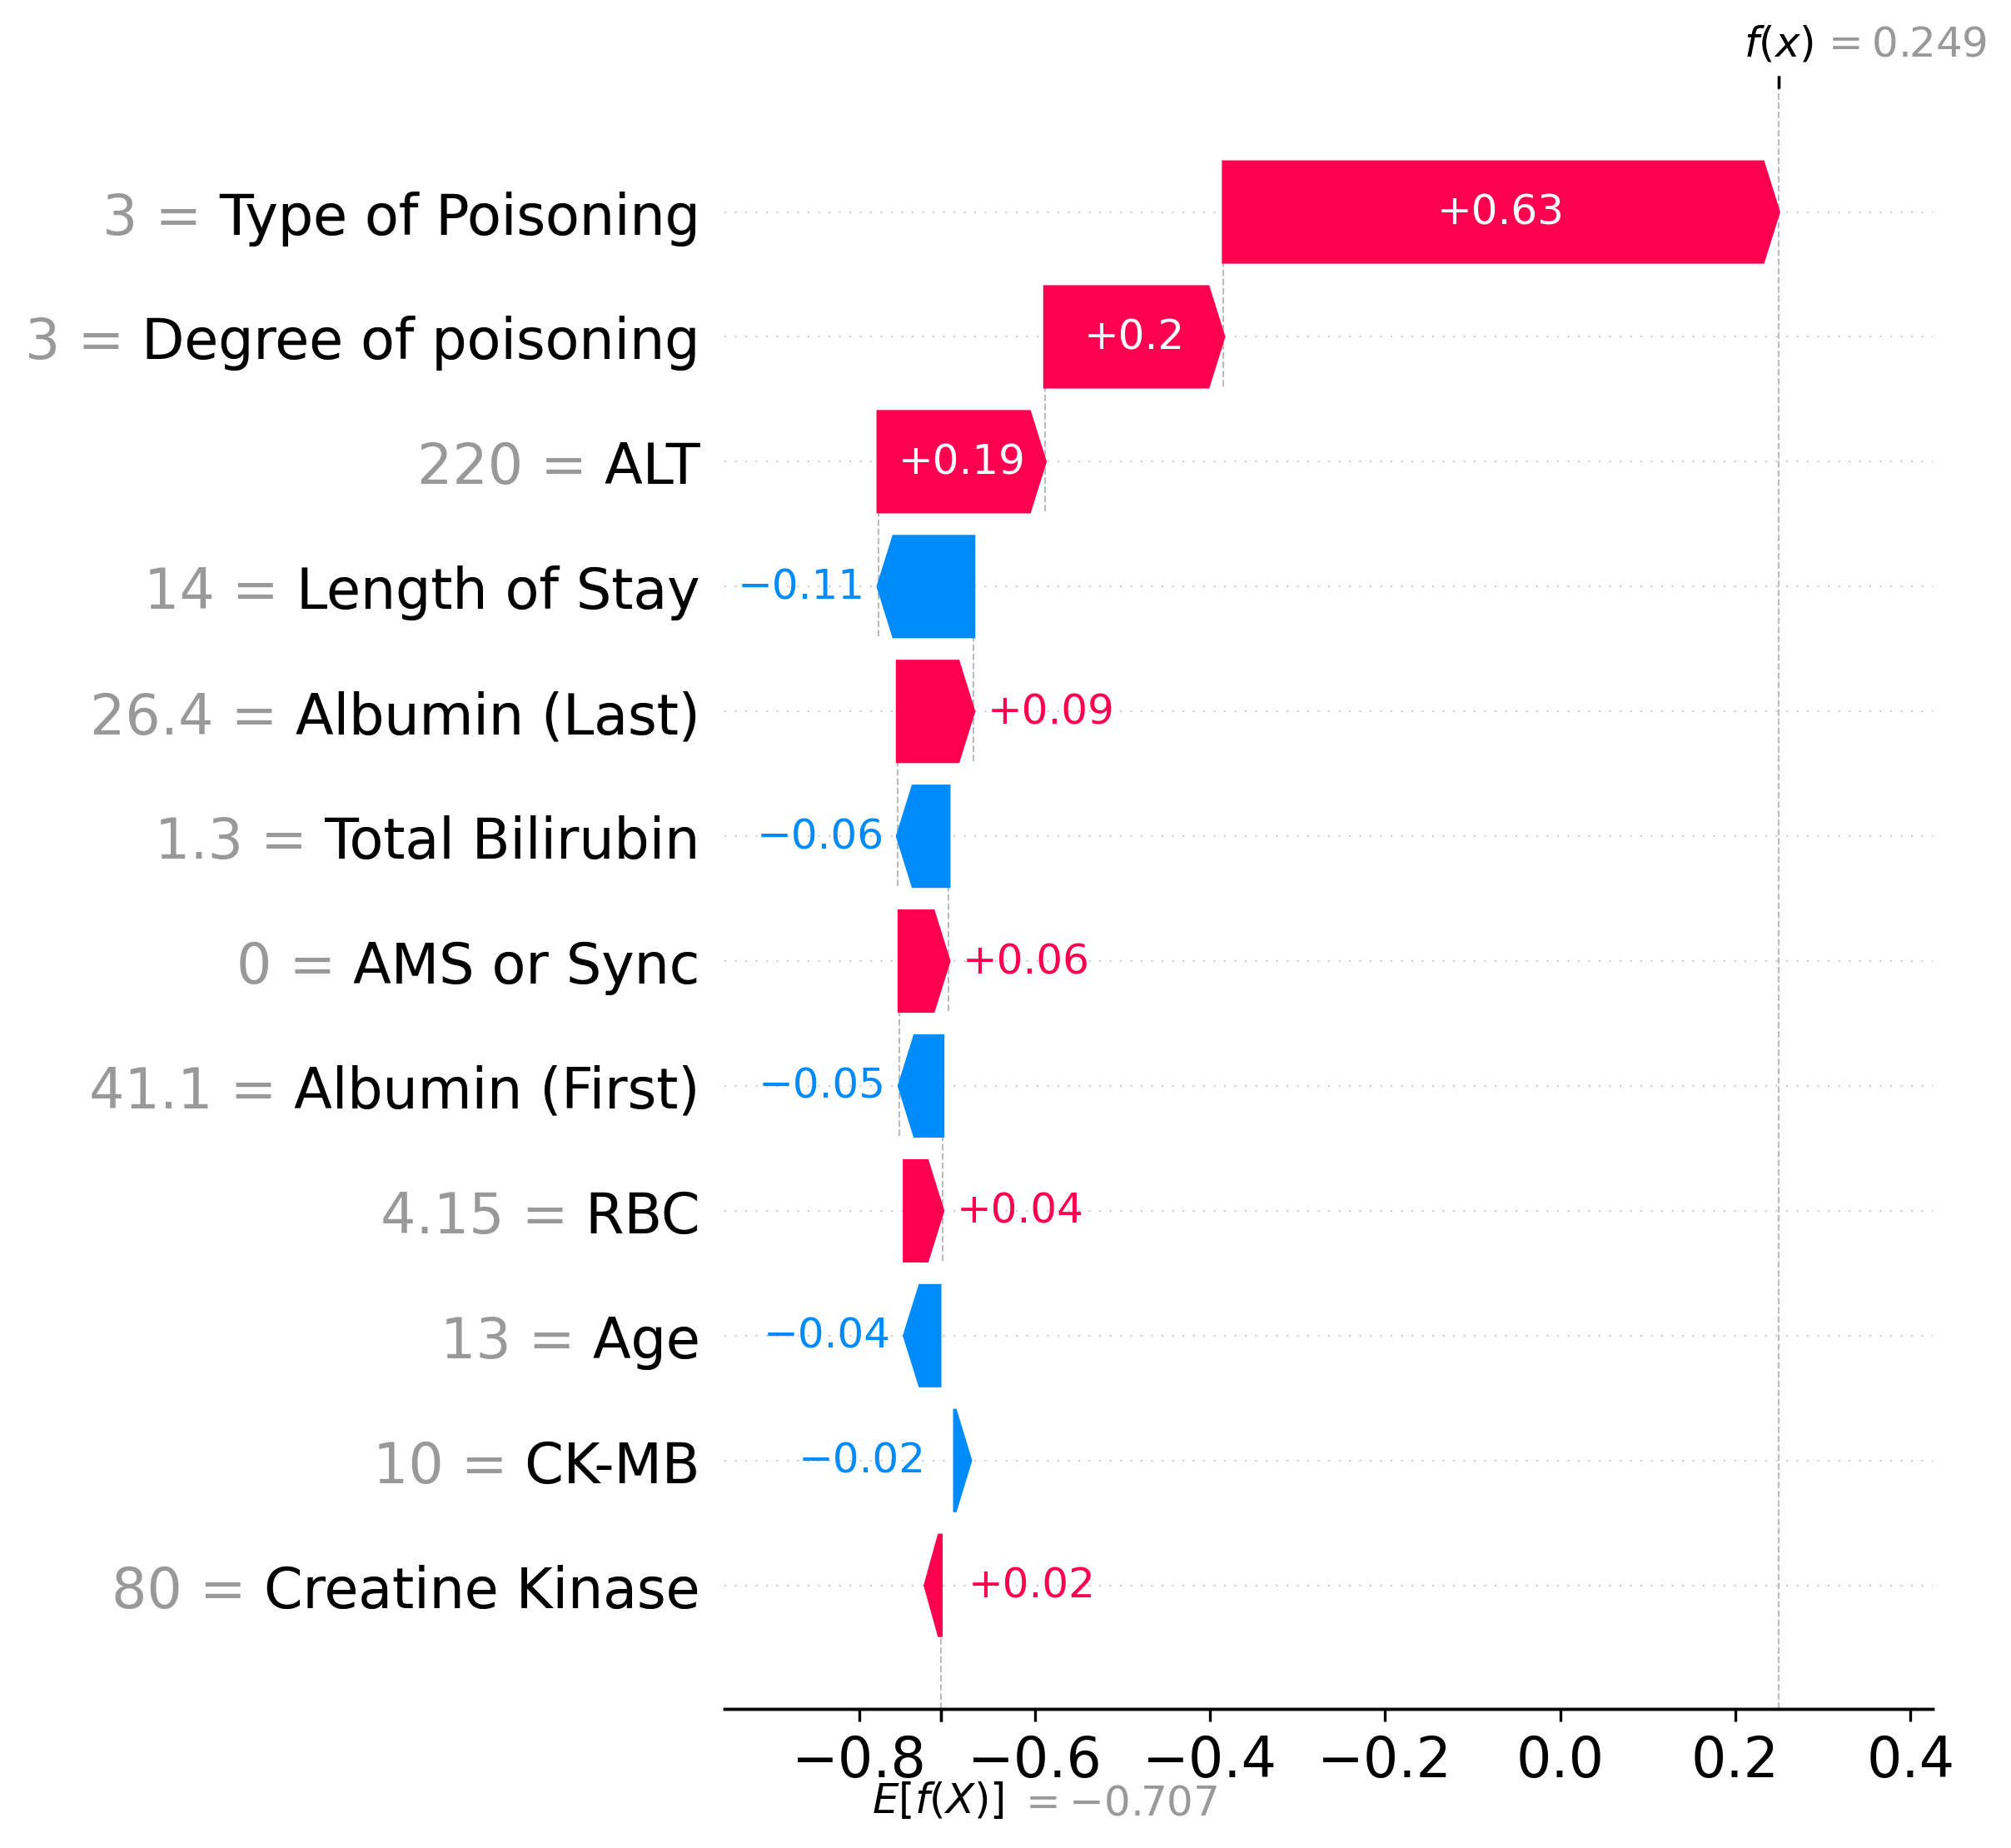

.values =
array([ 0.63354067,  0.20393693,  0.19035437, -0.10891295,  0.0868308 ,
       -0.05847351,  0.05647524, -0.04951241,  0.04358931, -0.04012173,
       -0.01729597,  0.01581451])

.base_values =
np.float64(-0.7070043826096165)

.data =
array(['3', '3', np.float64(220.0), np.float64(14.0), np.float64(26.4),
       np.float64(1.3), '0', np.float64(41.1), np.float64(4.15),
       np.int64(13), np.float64(10.0), np.float64(80.0)], dtype=object)

In [ ]:
### Example: Select a patient ###
patient_id = 5177734

plot_patient_shap_by_hospital_id(
    hospital_id=patient_id,
    shap_values=results["shap_values"],
    explainer=results["explainer"],
    X=results["X"],
    pred_result=results["pred_result"],
    max_display=12
)


## LLM explains patient risk

In [ ]:
### Enter HospitalID to return JSON text explanation (including Feature description)
import numpy as np
import pandas as pd
import shap
import json

def get_patient_shap_json(
        hospital_id,
        shap_values,
        explainer,
        X,
        pred_result,
        rename_dict=None,
        feature_desc_mapping=None,
        max_display=12
    ):

    # --- 找患者 ---
    match_idx = pred_result.index[pred_result["Hospital ID"] == hospital_id].tolist()
    if len(match_idx) == 0:
        raise ValueError(f"未找到 Hospital ID = {hospital_id}")
    patient_idx = match_idx[0]

    prob = float(pred_result.loc[patient_idx, "y_pred"])
    expected_value = explainer.expected_value

    # --- Automatic recognition of SHAP format ---
    # Case 1: Single Output Model numpy array
    if isinstance(shap_values, np.ndarray):
        baseline = float(expected_value)
        shap_row = shap_values[patient_idx]

    # Case 2：CatBoost dichotomy list
    elif isinstance(shap_values, list):
        # expected_value 为 list：[base_neg_class, base_pos_class]
        baseline = float(expected_value[1])
        shap_row = shap_values[1][patient_idx]

    else:
        raise ValueError("shap_values Format not recognized")

    # --- fetch Top-K ---
    feature_row = X.iloc[patient_idx]
    feature_names = X.columns.to_numpy()

    sorted_idx = np.argsort(-np.abs(shap_row))
    top_idx = sorted_idx[:max_display]

    shap_top = shap_row[top_idx]
    feature_top = feature_row.iloc[top_idx]
    feature_name_top = feature_names[top_idx]

    if rename_dict:
        display_names = [rename_dict.get(n, n) for n in feature_name_top]
    else:
        display_names = feature_name_top

    # --- Constructing JSON ---
    explanation = {
        "hospital_id": hospital_id,
        "predicted_probability (28-day out-of-hospital mortality risk)": prob,
        "baseline_expected_value (population average  risk logit value without patient-specific features)": baseline,
        "SHAP_waterfall_plot_output_function_value (baseline expected value plus the sum of all feature contributions for the patient)": baseline + float(np.sum(shap_top)),
        "top_features": []
    }

    for name, disp, value, shap_val in zip(feature_name_top, display_names, feature_top, shap_top):
        explanation["top_features"].append({
            "feature_name": name,
            # "display_name": disp,
            "feature_description": feature_desc_mapping.get(name, ""),
            "value": None if pd.isna(value) else float(value),
            "shap_value": float(shap_val),
            "direction": "increase_risk" if shap_val > 0 else "decrease_risk"
        })
    return explanation


In [19]:
feature_desc_mapping = {
    'Gender': 'Gender (1 = Male; 0 = Female)',
    'Education Level': 'Education Level (1 = Illiterate; 2 = Primary School; 3 = Junior High School; 4 = Senior High School; 5 = University)',
    'Type of Poisoning': 'Type of Poisoning (1 = Industrial; 2 = Drug; 3 = Pesticide; 4 = Alcohol; 0 = Uncertain)',
    'Hypertension': 'Hypertension (1 = Yes; 0 = No)',
    'Hyperlipidemia': 'Hyperlipidemia (1 = Yes; 0 = No)',
    'Diabetes Mellitus': 'Diabetes Mellitus (1 = Yes; 0 = No)',
    'Cerebrovascular Disease': 'Cerebrovascular Disease (1 = Yes; 0 = No)',
    'Heart Disease': 'Heart Disease (1 = Yes; 0 = No)',
    'Allergy History': 'Allergy History (1 = Yes; 0 = No)',
    'Cancer': 'Cancer (1 = Yes; 0 = No)',
    'Poisoning': 'Poisoning (1 = Yes; 0 = No)',
    'degree of poisoning': 'Degree of Poisoning (0 = Unknown; 1 = Low; 2 = Medium; 3 = High)',
    'Smoking Status': 'Smoking (1 = Yes; 0 = No)',
    'Alcohol Consumption Status': 'Alcohol Consumption Status (1 = Yes; 0 = No)',
    'Shortness of Breath': 'Shortness of Breath (1 = Yes; 0 = No)',
    'Chest Pain': 'Chest Pain (1 = Yes; 0 = No)',
    'Cough': 'Cough (1 = Yes; 0 = No)',
    'Pre-syncope': 'Pre-syncope (1 = Yes; 0 = No)',
    'Altered Consciousness or Syncope': 'Altered Mental Status or Syncope (1 = Yes; 0 = No)',
    'Sore Throat': 'Sore Throat (1 = Yes; 0 = No)',
    'Fever': 'Fever (1 = Yes; 0 = No)',
    'Fatigue': 'Fatigue (1 = Yes; 0 = No)',
    'Lower Limb Edema': 'Lower Limb Edema (1 = Yes; 0 = No)',
    'Palpitations': 'Palpitations (1 = Yes; 0 = No)',
    'Vomiting': 'Vomiting (1 = Yes; 0 = No)',
    'Nausea': 'Nausea (1 = Yes; 0 = No)',
    'Weakness': 'Weakness (1 = Yes; 0 = No)',
    'Headache': 'Headache (1 = Yes; 0 = No)',
    'Residence': 'Residence (1 = Rural; 2 = Urban)',
    'Age': 'Age (years)',
    'Length of Stay': 'Length of Stay (days)',
    'Weight': 'Weight (Kg)',
    'Systolic Blood Pressure': 'Systolic Blood Pressure (mmHg)',
    'Diastolic Blood Pressure': 'Diastolic Blood Pressure (mmHg)',
    'Respiratory Rate': 'Respiratory Rate (breaths/minute)',
    'Heart Rate': 'Heart Rate (beats/minute)',
    'White Blood Cell Count': 'White Blood Cell Count (WBC) (10*9/L)',
    'Red Blood Cell Count': 'Red Blood Cell Count (RBC) (10*9/L)',
    'Hemoglobin Concentration': 'Hemoglobin Concentration (Hgb) (g/L)',
    'Mean Corpuscular Volume': 'Mean Corpuscular Volume (MCV) (fL)',
    'Mean Corpuscular Hemoglobin': 'Mean Corpuscular Hemoglobin (MCH) (pg)',
    'Mean Corpuscular Hemoglobin Concentration': 'Mean Corpuscular Hemoglobin Concentration (MCHC) (g/L)',
    'Platelet Count': 'Platelet Count (PLT) (10*9/L)',
    'Mean Platelet Volume': 'Mean Platelet Volume (MPV) (fL)',
    'Alanine Aminotransferase (ALT)': 'Alanine Aminotransferase (ALT) (U/L)',
    'Total Bilirubin': 'Total Bilirubin (TBIL) (umol/L)',
    'Direct Bilirubin': 'Direct Bilirubin (DBIL) (umol/L)',
    'Lactate Dehydrogenase (LDH)': 'Lactate Dehydrogenase (LDH) (U/L)',
    'Urea': 'Urea (mmol/L)',
    'Serum Creatinine': 'Serum Creatinine (Scr) (umol/L)',
    'Uric Acid': 'Uric Acid (UA) (umol/L)',
    'Creatine Kinase (CK)': 'Creatine Kinase (CK) (ng/mL)',
    'Creatine Kinase-MB Isoenzyme': 'Creatine Kinase-MB (CK-MB) (ng/mL)',
    'Troponin I': 'Troponin I (cTnl) (ng/mL)',
    'High-Sensitivity C-Reactive Protein (hs-CRP)': 'High-Sensitivity C-Reactive Protein (hs-CRP) (mg/L)',
    'Homocysteine': 'Homocysteine (Hcy) (umol/L)',
    'Blood Cholinesterase Test Results': 'Blood Cholinesterase Test Results (ChE) (U/L)',
    'Albumin (First Measurement)': 'Albumin (First Measurement) (Alb-first) (g/L)',
    'Albumin (Last Measurement)': 'Albumin (Last Measurement) (Alb-last) (g/L)',
    'Number of Hemoperfusion Sessions': 'Number of Hemoperfusion Sessions',
    'Number of Blood Purification Sessions': 'Number of Blood Purification Sessions'
}

In [ ]:
### For drawing ###

patient_id = 5177734

result_json = get_patient_shap_json(
    hospital_id=patient_id,
    shap_values=results["shap_values"],   # 直接传入 numpy array 或 list
    explainer=results["explainer"],
    X=results["X"],
    pred_result=results["pred_result"],
    rename_dict=rename_dict,              # 可选显示名称
    feature_desc_mapping=feature_desc_mapping,  # 字典 value 作为 Feature description
    max_display=20
)

print(json.dumps(result_json, indent=4, ensure_ascii=False))


{
    "hospital_id": 5177734,
    "predicted_probability (28-day out-of-hospital mortality risk)": 0.714528411851709,
    "baseline_expected_value (population average  risk logit value without patient-specific features)": -0.7070043826096165,
    "SHAP_waterfall_plot_output_function_value (baseline expected value plus the sum of all feature contributions for the patient)": 0.2519658243806948,
    "top_features": [
        {
            "feature_name": "Type of Poisoning",
            "feature_description": "Type of Poisoning (1 = Industrial; 2 = Drug; 3 = Pesticide; 4 = Alcohol; 0 = Uncertain)",
            "value": 3.0,
            "shap_value": 0.6335406736313894,
            "direction": "increase_risk"
        },
        {
            "feature_name": "degree of poisoning",
            "feature_description": "Degree of Poisoning (0 = Unknown; 1 = Low; 2 = Medium; 3 = High)",
            "value": 3.0,
            "shap_value": 0.20393693203919855,
            "direction": "increase_r

In [ ]:
### Example output for constructing cue words ###

patient_id = 5324831

result_json = get_patient_shap_json(
    hospital_id=patient_id,
    shap_values=results["shap_values"],
    explainer=results["explainer"],
    X=results["X"],
    pred_result=results["pred_result"],
    rename_dict=rename_dict,
    feature_desc_mapping=feature_desc_mapping,
    max_display=2
)

print(json.dumps(result_json, indent=4, ensure_ascii=False))


{
    "hospital_id": 5324831,
    "predicted_probability (28-day out-of-hospital mortality risk)": 0.7327379635224585,
    "baseline_expected_value (population average  risk logit value without patient-specific features)": -0.7070043826096165,
    "SHAP_waterfall_plot_output_function_value (baseline expected value plus the sum of all feature contributions for the patient)": -1.2611384854322831,
    "top_features": [
        {
            "feature_name": "Type of Poisoning",
            "feature_description": "Type of Poisoning (1 = Industrial; 2 = Drug; 3 = Pesticide; 4 = Alcohol; 0 = Uncertain)",
            "value": 1.0,
            "shap_value": -0.4060639874126393,
            "direction": "decrease_risk"
        },
        {
            "feature_name": "White Blood Cell Count",
            "feature_description": "White Blood Cell Count (WBC) (10*9/L)",
            "value": 5.3,
            "shap_value": -0.14807011541002726,
            "direction": "decrease_risk"
        }
    ]

In [33]:
json_input = None
prompt = f"""
You are a medical AI assistant. Based on the provided SHAP (SHapley Additive exPlanations) waterfall JSON data, generate a concise, clinically interpretable report for each patient. The goal is to translate model outputs into actionable clinical insights.

### Input Data:
{json_input}

### Instructions for the output:
1. **Overall Risk Assessment**:  
   - Start with: “The patient’s predicted 28-day out-of-hospital mortality risk is [predicted_probability]”  
   - Classify the risk as **high**, **medium**, or **low**.  

2. **Key Risk Drivers**:  
   - Identify the top 3–5 features with the largest absolute SHAP values.  
   - For each feature, include:  
     - Feature name and actual value.  
     - Clinical interpretation (normal/abnormal, clinical relevance).  
     - Effect on risk (increases or decreases).  

3. **Secondary Protective Factors**:  
   - Mention 1–2 features with negative SHAP values that substantially reduce risk.  
   - Explain their protective effect in simple clinical terms.  

4. **Conclusion and Clinical Recommendations**:  
   - Provide a concise summary of overall risk and contributing factors.  
   - Highlight key indicators that require close monitoring or intervention.  

### Output Style:
- Use clear, professional, clinical language.  
- Keep explanations concise, focusing on actionable insights.  
- Format as a short paragraph per patient.  

### Example Output:
The patient’s predicted 28-day out-of-hospital mortality risk is 0.733, classified as high. The elevated risk is primarily driven by industrial toxin exposure (type=1) and high severity of poisoning. Protective factors include a normal white blood cell count (5.3×10⁹/L) and adequate albumin levels (40.5 g/L), reducing the predicted risk. In summary, despite severe poisoning, stable physiological indicators and sufficient treatment support survival. Close monitoring of cardiac enzymes and liver/kidney function is recommended.
"""


In [34]:
len(result_json) + len(prompt)

1948

In [ ]:
import os
os.environ["TRANSFORMERS_OFFLINE"] = "1"
os.environ["HF_HUB_OFFLINE"] = "1"
os.environ["UNSLOTH_OFFLINE"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import unsloth
import torch
from unsloth import FastLanguageModel
from transformers import AutoTokenizer


# ============================================
# 1️⃣ loading model
# ============================================
max_seq_length = 18432
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="/home/mailiyi/LLM-Fine-tuning/LLM_models_downloads/Qwen3-32B-unsloth-bnb-4bit",
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit,
    device_map="auto",
)

# ============================================
# 2️⃣ Define your cue template
# ============================================
def build_prompt(json_input):
    prompt = f"""
You are a medical AI assistant. Based on the provided SHAP (SHapley Additive exPlanations) waterfall JSON data, generate a concise, clinically interpretable report for each patient. The goal is to translate model outputs into actionable clinical insights.

### Input Data:
{json_input}

### Instructions for the output:
1. **Overall Risk Assessment**:  
   - Start with: “The patient’s predicted 28-day out-of-hospital mortality risk is [predicted_probability]”  
   - Classify the risk as **high**, **medium**, or **low**.  

2. **Key Risk Drivers**:  
   - Identify the top 3–5 features with the largest absolute SHAP values.  
   - For each feature, include:  
     - Feature name and actual value.  
     - Clinical interpretation (normal/abnormal, clinical relevance).  
     - Effect on risk (increases or decreases).  

3. **Secondary Protective Factors**:  
   - Mention 1–2 features with negative SHAP values that substantially reduce risk.  
   - Explain their protective effect in simple clinical terms.  

4. **Conclusion and Clinical Recommendations**:  
   - Provide a concise summary of overall risk and contributing factors.  
   - Highlight key indicators that require close monitoring or intervention.  

### Output Style:
- Use clear, professional, clinical language.  
- Keep explanations concise, focusing on actionable insights.  
- Format as a short paragraph per patient.  

### Example Output:
The patient’s predicted 28-day out-of-hospital mortality risk is 0.733, classified as high. The elevated risk is primarily driven by industrial toxin exposure (type=1) and high severity of poisoning. Protective factors include a normal white blood cell count (5.3×10⁹/L) and adequate albumin levels (40.5 g/L), reducing the predicted risk. In summary, despite severe poisoning, stable physiological indicators and sufficient treatment support survival. Close monitoring of cardiac enzymes and liver/kidney function is recommended.
"""
    return prompt.strip()


# ============================================
# 3️⃣ No thinking mode (output removed<think>)
# ============================================
def generate_no_think(model, tokenizer, messages, max_new_tokens=256, temperature=0.0, do_sample=False):
    if isinstance(messages, str):
        messages = [{"role": "user", "content": messages}]
    elif isinstance(messages, list):
        messages = [m if isinstance(m, dict) else {"role": "user", "content": m} for m in messages]
    elif isinstance(messages, dict):
        messages = [messages]

    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        return_tensors="pt",
        enable_thinking=False,
    ).to(model.device)

    attention_mask = torch.ones_like(input_ids)

    outputs = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_new_tokens=max_new_tokens,
        temperature=temperature,
        do_sample=do_sample,
        pad_token_id=tokenizer.eos_token_id,
    )

    generated_text = tokenizer.decode(outputs[0][input_ids.shape[-1]:], skip_special_tokens=True)

    import re
    cleaned = re.sub(r"<think>.*?</think>", "", generated_text, flags=re.DOTALL).strip()
    return cleaned


# ============================================
# 4️⃣ Call example
# ============================================
if __name__ == "__main__":
    json_input = json.dumps(result_json, indent=4, ensure_ascii=False)
    prompt = build_prompt(json_input)
    messages = [
        {"role": "system", "content": "You are a concise and professional medical AI assistant."},
        {"role": "user", "content": prompt},
    ]
    response = generate_no_think(model, tokenizer, messages, max_new_tokens=512)
    print("🧠 model output：\n", response)


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.10.1: Fast Qwen3 patching. Transformers: 4.56.2.
   \\   /|    NVIDIA A40. Num GPUs = 1. Max memory: 44.352 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu128. CUDA: 8.6. CUDA Toolkit: 12.8. Triton: 3.4.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


🧠 模型输出：
 The patient’s predicted 28-day out-of-hospital mortality risk is 0.715, classified as high. The elevated risk is primarily driven by pesticide poisoning (type=3), which is associated with severe systemic toxicity, and a high degree of poisoning (degree=3), indicating critical illness severity. Elevated Alanine Aminotransferase (ALT) at 220 U/L reflects significant liver injury, further increasing mortality risk. Protective factors include a relatively short Length of Stay (14 days), suggesting timely medical intervention, and a normal Total Bilirubin level (1.3 µmol/L), indicating preserved liver excretory function. In summary, the patient presents with severe poisoning and liver injury, contributing to a high mortality risk. Close monitoring of hepatic function, toxin clearance, and clinical response to treatment is essential.


In [23]:
from rich.console import Console
from rich.panel import Panel
from rich.markdown import Markdown

console = Console(width=100)

# response = generate_no_think(model, tokenizer, messages, max_new_tokens=512)

console.print(
    Panel(
        Markdown(response),
        title="🧠 Clinical SHAP Interpretation",
        subtitle="Qwen3-32B — Medical Report",
        border_style="magenta"
    )
)



╭──────────────────────────────── 🧠 Clinical SHAP Interpretation ─────────────────────────────────╮
│ The patient’s predicted 28-day out-of-hospital mortality risk is 0.715, classified as high. The  │
│ elevated risk is primarily driven by pesticide poisoning (type=3), which is associated with      │
│ severe systemic toxicity, and a high degree of poisoning (degree=3), indicating critical illness │
│ severity. Elevated Alanine Aminotransferase (ALT) at 220 U/L reflects significant liver injury,  │
│ further increasing mortality risk. Protective factors include a relatively short Length of Stay  │
│ (14 days), suggesting timely medical intervention, and a normal Total Bilirubin level (1.3       │
│ µmol/L), indicating preserved liver excretory function. In summary, the patient presents with    │
│ severe poisoning and liver injury, contributing to a high mortality risk. Close monitoring of    │
│ hepatic function, toxin clearance, and clinical response to treatment is essential.              │
╰─────────────────────────────────── Qwen3-32B — Medical Report ───────────────────────────────────╯

## 4. Single Feature SHAP Trend Plot

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def retrain_with_top_shap_features(result_dict, dataX, dataY, top_k=20, cat_features=None):
    """
    Select TopK features based on optimal model SHAP → Retrain CatBoost with these features → Return SHAP + AUROC
    """

    best_model = result_dict["best_model"]
    X_full = result_dict["X"]

    # ---------- 1) Finding top_k feature based on SHAP ----------
    print("\n===== Select Top{} Features Based on SHAP of Optimal Model =====".format(top_k))
    
    shap_matrix = result_dict["shap_values"]
    feature_names = X_full.columns

    mean_abs_shap = np.abs(shap_matrix).mean(axis=0)
    top_indices = np.argsort(mean_abs_shap)[::-1][:top_k]
    selected_features = feature_names[top_indices].tolist()

    print("Top {} 特征：".format(top_k))
    for i, feat in enumerate(selected_features, 1):
        print(f"{i}. {feat}")

    # ---------- 2) prepare data ----------
    X_selected = dataX[selected_features].copy()

    if cat_features is not None:
        cat_features_selected = [c for c in cat_features if c in selected_features]
        for c in cat_features_selected:
            X_selected[c] = X_selected[c].astype(str).fillna("missing")
    else:
        cat_features_selected = None

    # Train/Val segmentation
    X_train, X_val, y_train, y_val = train_test_split(
        X_selected, dataY, test_size=0.2, random_state=9762, stratify=dataY
    )

    train_pool = Pool(X_train, label=y_train, cat_features=cat_features_selected)
    val_pool   = Pool(X_val,   label=y_val,   cat_features=cat_features_selected)

    # ---------- 3) model training ----------
    params = {
        'depth': 5,
        'iterations': 200,
        'learning_rate': 0.05,
        'loss_function': "Logloss",
        'eval_metric': "AUC",
        'random_seed': 9762,
        'verbose': False
    }

    print("\n===== Retrain CatBoost with Top{} Features =====".format(top_k))
    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=val_pool, verbose=False)

    # ---------- 4) Calculate AUROC ----------
    val_pred = model.predict_proba(val_pool)[:, 1]
    auroc = roc_auc_score(y_val, val_pred)
    print(f"\n🔵 Top{top_k} characteristic model AUROC = {auroc:.4f}")

    # ---------- 5) Recalculate SHAP ----------
    print("\n===== Recalculate SHAP (Top Feature Model) =====")
    explainer = shap.TreeExplainer(model)
    shap_expl = explainer(X_selected)
    shap_values = shap_expl.values  # numpy array

    shap_df = pd.DataFrame(shap_values, columns=selected_features)
    return {
        "selected_features": selected_features,
        "cat_features_selected": cat_features_selected,
        "model": model,
        "explainer": explainer,
        "shap_values": shap_df,
        "X_selected": X_selected,
        "auroc": auroc,
    }


In [ ]:
dataX = df_mapped_wide[['Hospital ID']+features_categorical + features_continuous]
dataY = df_mapped_wide['Outcome_other']

result = train_catboost_5fold_cv_shap_total(dataX, dataY, cat_features=features_categorical)

top_result = retrain_with_top_shap_features(
    result,
    dataX,
    dataY,
    top_k=20,
    cat_features=features_categorical
)


In [18]:
# ########################################### 个别特征SHAP ##########################################
# search_path = '/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death/depth_5_iterations_200_learning_rate_0.05/'

# def get_data(dataX, search_path, file='best_fold_2_all_patients_shap_values.csv'):
#     # data = pd.read_csv(os.path.join(search_path, 'fs3_data.csv'))
#     # X = data.iloc[:, :-1]
#     X = dataX.copy()
#     shap_values = pd.read_csv(os.path.join(search_path, file))
#     return X, shap_values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    if value >= 1000:
        return f"{int(value/1000)}k"
    elif value >= 500:
        return f"{round(value/1000,1)}k"
    else:
        return str(int(value))


def plot_shap_dependence_lowess(
    X, shap_values,
    fname,
    title_name=None,
    frac=0.5,
    lower_percentile=0,
    upper_percentile=95,
    shap_threshold=None,
    figsize=(3.8, 2.8),
    dpi=300,
    dot_color='lightskyblue',
    line_color='lightcoral',
    hist_color='gray',
    hist_alpha=0.8,
    bins=20,
    fontsize=9
):
    """
    Draw SHAP dependency plot (Scatter + LOWESS + Right Histogram), Histogram at bottom
    """

    x = X[fname]
    s = shap_values[fname]
    lower_bound = np.nanpercentile(x, lower_percentile)
    upper_bound = np.nanpercentile(x, upper_percentile)
    valid_indices = np.where((x >= lower_bound) & (x <= upper_bound))[0]

    if shap_threshold is not None:
        valid_indices = valid_indices[s[valid_indices] <= shap_threshold]

    filtered_x = x[valid_indices]
    filtered_s = s[valid_indices]

    fig, axes = plt.subplots(1,1,figsize=figsize,dpi=dpi)
    smoothed = lowess(filtered_s, filtered_x, frac=frac, return_sorted=True)
    ax2 = axes.twinx()

    counts, bins_edges = np.histogram(filtered_x, bins=bins)
    width = np.diff(bins_edges)
    ax2.bar(
        bins_edges[:-1],
        counts,
        width=width,
        color=hist_color,
        alpha=hist_alpha,
        zorder=0,
        align='edge'
    )
    ax2.set_ylabel('Count', fontsize=fontsize)
    ax2.tick_params(axis='y', labelsize=fontsize)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_func))

    # ---------- splashes ----------
    axes.scatter(
        filtered_x,
        filtered_s,
        c=dot_color,
        marker='.',
        s=30,
        alpha=1,
        label='Patient-level SHAP values', ## Individual SHAP Values
        zorder=1
    )

    # ---------- LOWESS curve ----------
    axes.plot(
        smoothed[:,0],
        smoothed[:,1],
        color=line_color,
        lw=2,
        # label='Smoothed SHAP Trend',
        zorder=2
    )
    axes.axhline(y=0, linestyle='--', color='black', alpha=0.3)
    axes.set_ylabel('SHAP value', fontsize=fontsize)
    axes.tick_params(axis='x', labelsize=fontsize)
    axes.tick_params(axis='y', labelsize=fontsize)

    handles1, labels1 = axes.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    axes.legend(
        handles1 + handles2,
        labels1 + labels2,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.1),
        # ncol=len(handles1 + handles2),
        ncol=1,
        fontsize=fontsize,
        frameon=False,
        markerscale=1.5
    )

    if title_name is None:
        title_name = fname
    plt.title(title_name, fontsize=fontsize+2)
    plt.tight_layout()
    plt.show()


- ALT

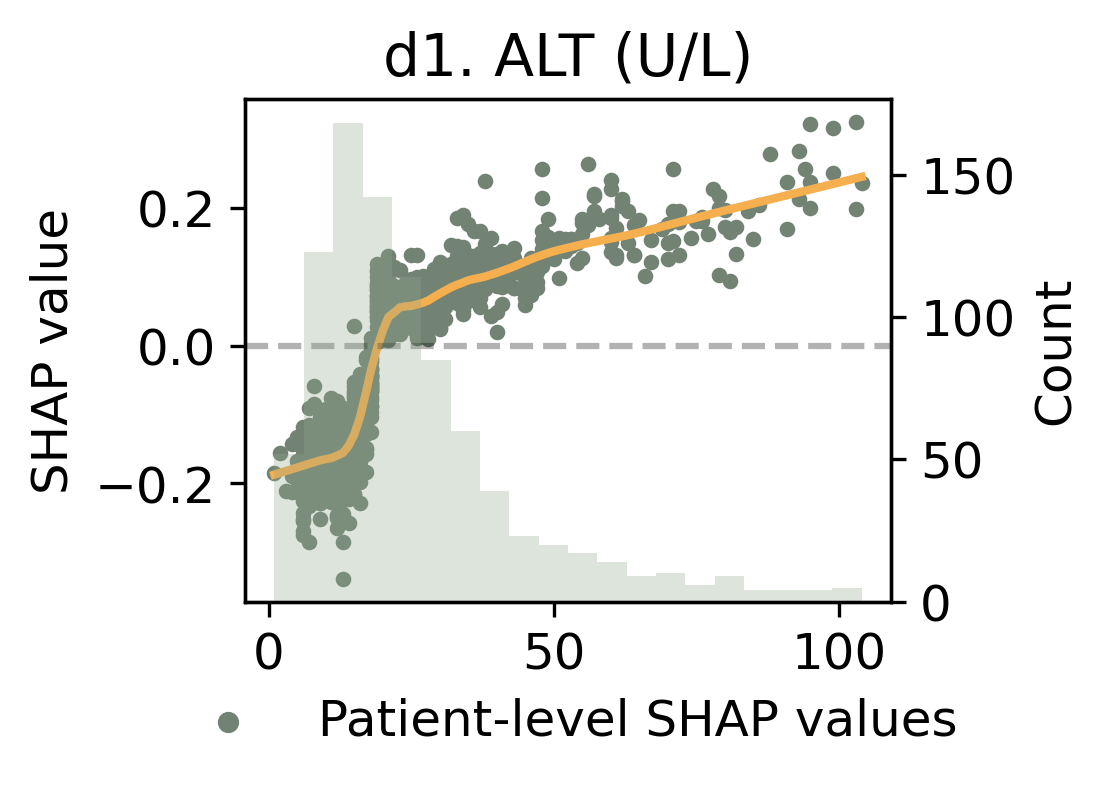

In [ ]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='Alanine Aminotransferase (ALT)',
    title_name='d1. ALT (U/L)',
    frac=0.3, ## 平滑度
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C",
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)


- WBC

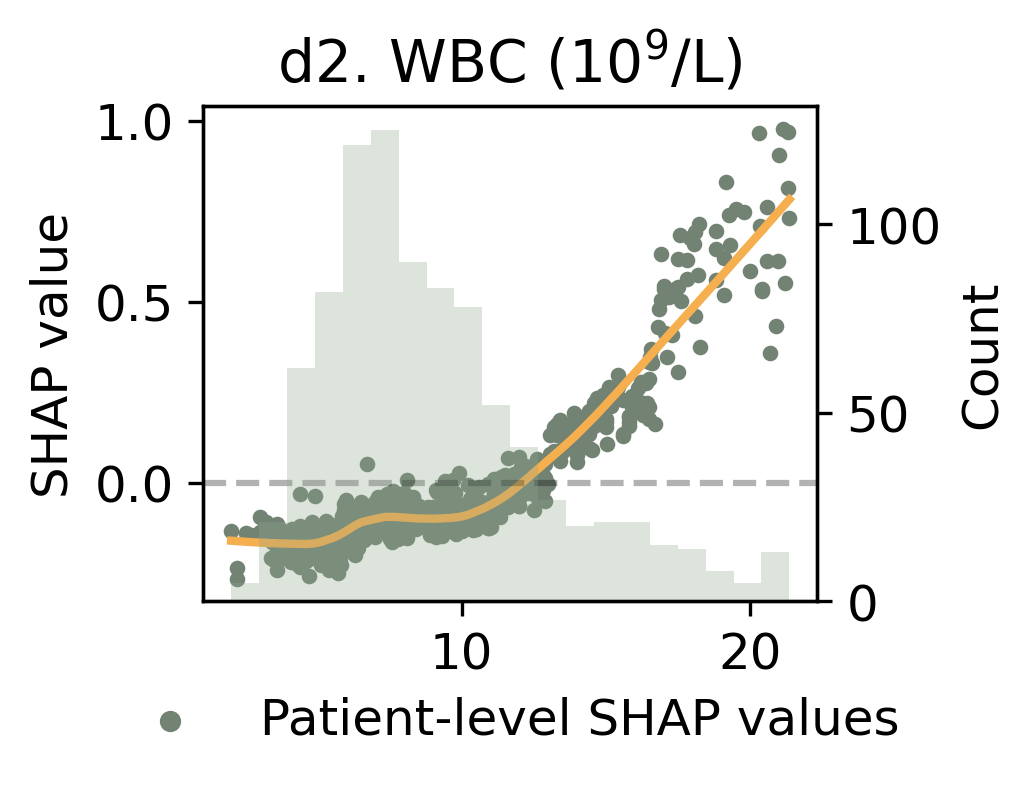

In [ ]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='White Blood Cell Count',
    # title_name='d2. WBC (10⁹/L)',
    title_name = r'd2. WBC (10$^9$/L)',
    frac=0.3, ## 平滑度
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C", 
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)


- Urea

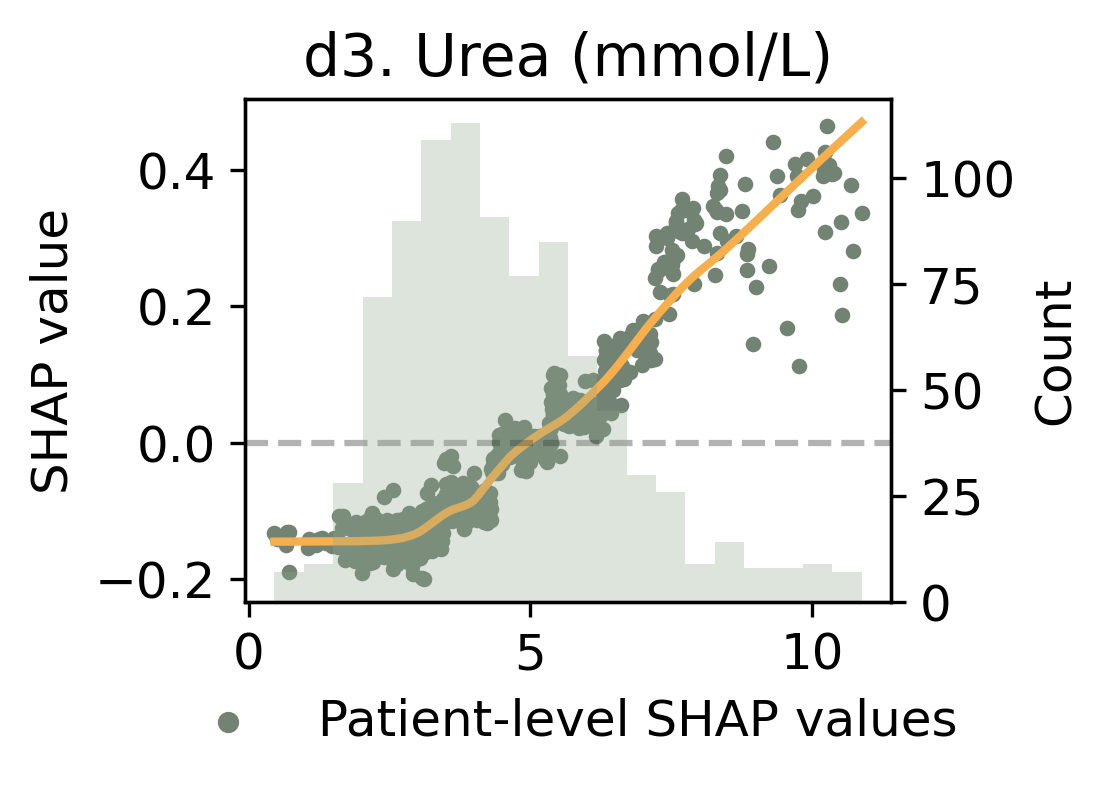

In [ ]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='Urea',
    title_name='d3. Urea (mmol/L)',
    frac=0.3, ## 平滑度
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C",
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)



#### For aSupplementary: OR plot comparison

In [ ]:

result = train_catboost_5fold_cv_shap_total(dataX, dataY, cat_features=features_categorical)

top_result = retrain_with_top_shap_features(
    result,
    dataX,
    dataY,
    top_k=20,
    cat_features=features_categorical
)



===== 使用固定参数: {'depth': 5, 'iterations': 200, 'learning_rate': 0.05} =====
Fold 1 AUROC = 0.8177
Fold 2 AUROC = 0.8968
Fold 3 AUROC = 0.8793
Fold 4 AUROC = 0.8880
Fold 5 AUROC = 0.8052

===== 最优模型来自 Fold 2, AUROC=0.8968 =====
计算 SHAP（使用全体样本）...

===== 基于最优模型的 SHAP 选出 Top20 特征 =====
Top 20 特征：
1. Type of Poisoning
2. Length of Stay
3. degree of poisoning
4. White Blood Cell Count
5. Age
6. Urea
7. Total Bilirubin
8. Altered Consciousness or Syncope
9. Creatine Kinase-MB Isoenzyme
10. Red Blood Cell Count
11. Alanine Aminotransferase (ALT)
12. Hemoglobin Concentration
13. Albumin (First Measurement)
14. Blood Cholinesterase Test Results
15. Albumin (Last Measurement)
16. Lactate Dehydrogenase (LDH)
17. Platelet Count
18. Creatine Kinase (CK)
19. Number of Blood Purification Sessions
20. Allergy History

===== 使用 Top20 特征重新训练 CatBoost =====

🔵 Top20 特征模型 AUROC = 0.9029

===== 重新计算 SHAP（Top特征模型） =====


- Length of Stay

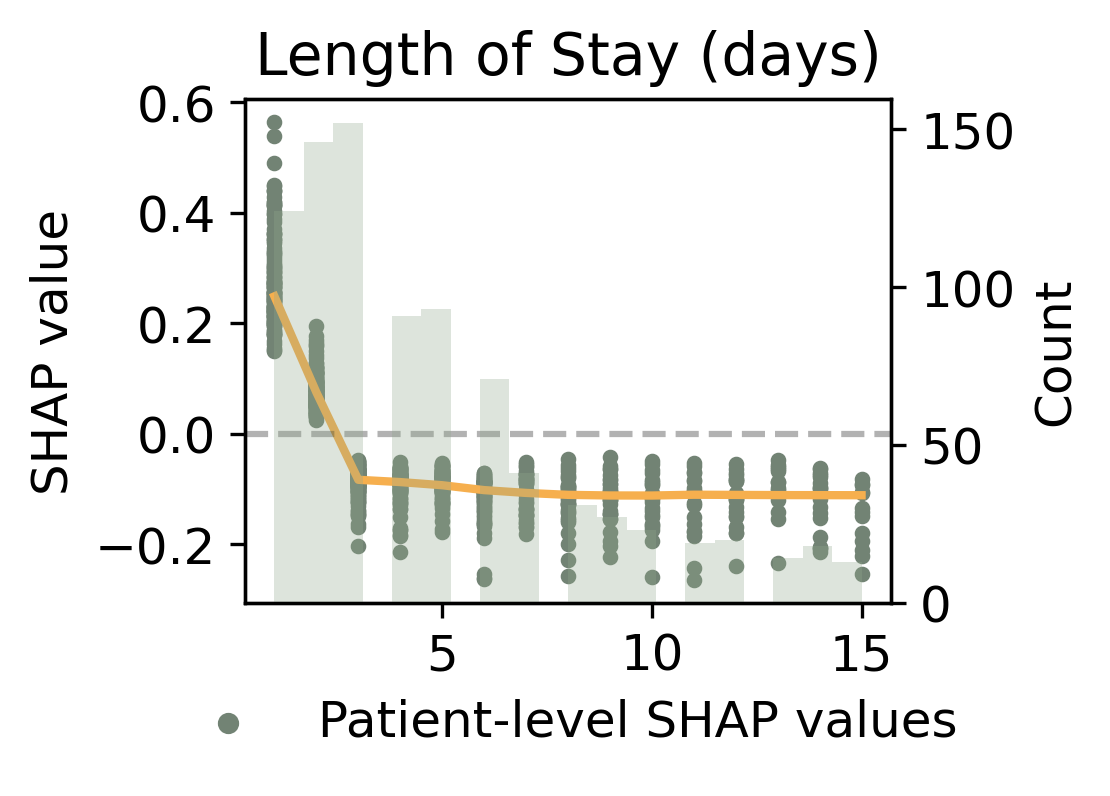

In [ ]:

plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='Length of Stay',
    title_name='Length of Stay (days)',
    frac=0.3,
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C", 
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)


- Age

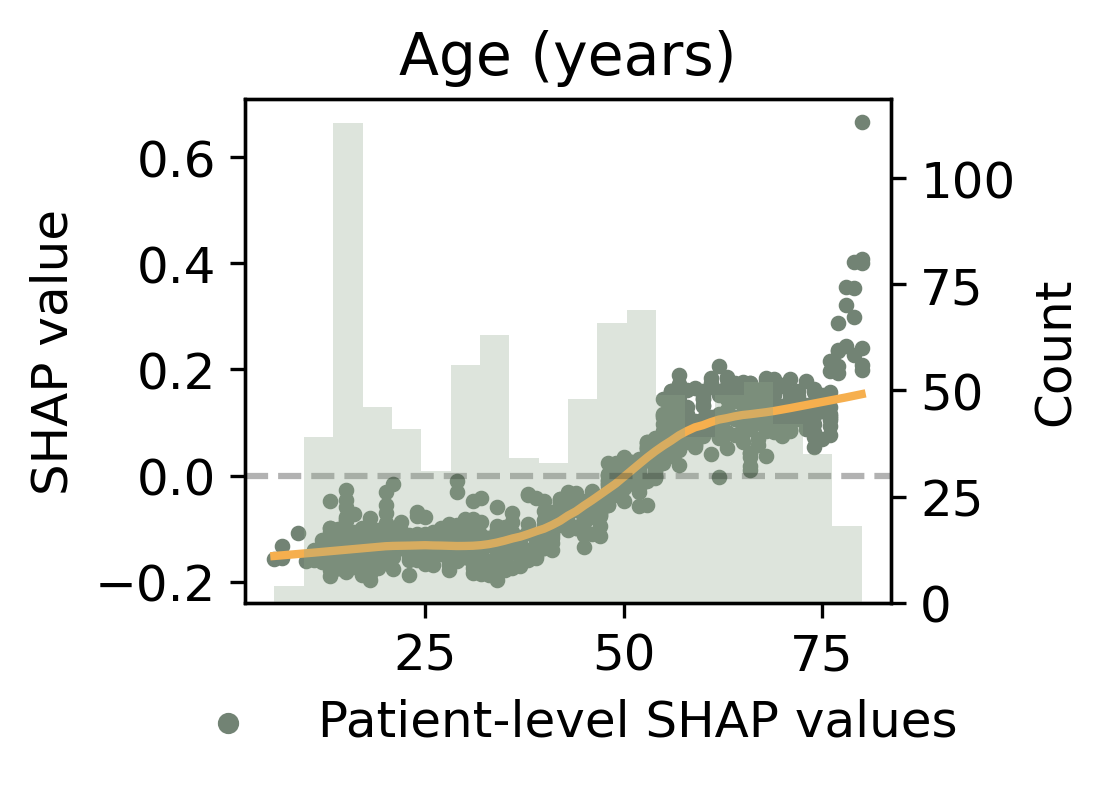

In [56]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='Age',
    title_name='Age (years)',
    frac=0.3, ## 平滑度
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C",   # 直方图颜色
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)


- WBC

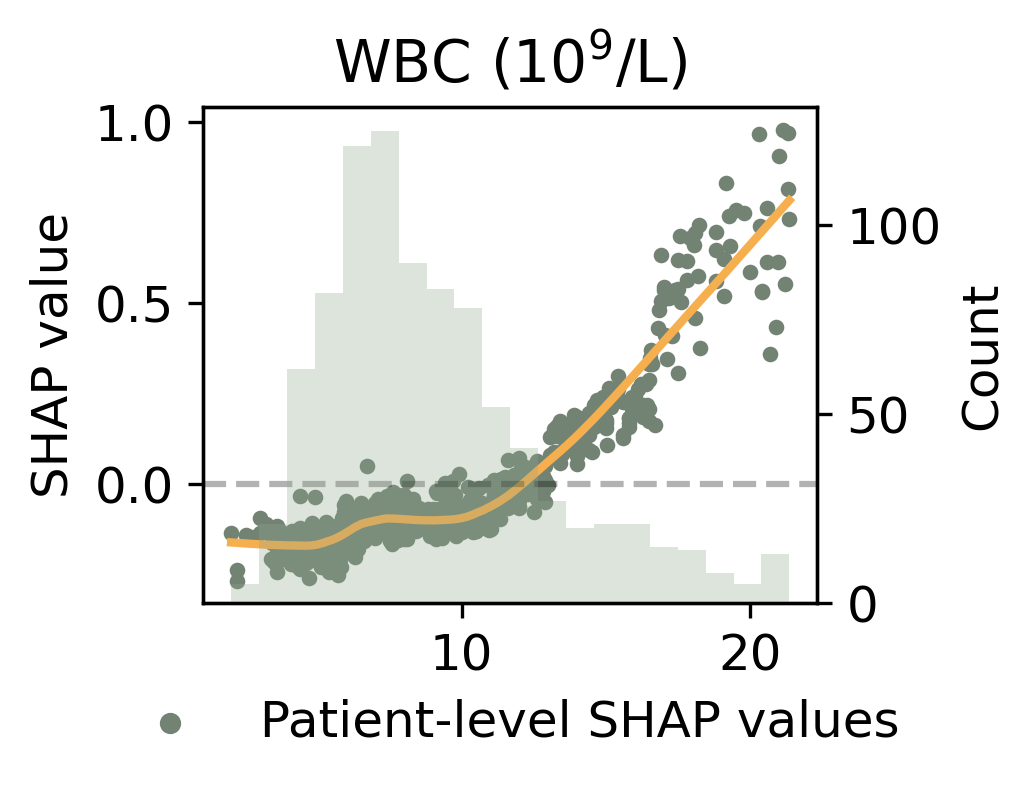

In [58]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='White Blood Cell Count',
    # title_name='d2. WBC (10⁹/L)',
    title_name = r'WBC (10$^9$/L)', ## 上标
    frac=0.3, ## 平滑度
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C",   # 直方图颜色
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)


In [59]:
result = train_catboost_5fold_cv_shap_total(dataX, dataY, cat_features=features_categorical)

top_result = retrain_with_top_shap_features(
    result,
    dataX,
    dataY,
    top_k=30,
    cat_features=features_categorical
)


===== 使用固定参数: {'depth': 5, 'iterations': 200, 'learning_rate': 0.05} =====
Fold 1 AUROC = 0.8177
Fold 2 AUROC = 0.8968
Fold 3 AUROC = 0.8793
Fold 4 AUROC = 0.8880
Fold 5 AUROC = 0.8052

===== 最优模型来自 Fold 2, AUROC=0.8968 =====
计算 SHAP（使用全体样本）...

===== 基于最优模型的 SHAP 选出 Top30 特征 =====
Top 30 特征：
1. Type of Poisoning
2. Length of Stay
3. degree of poisoning
4. White Blood Cell Count
5. Age
6. Urea
7. Total Bilirubin
8. Altered Consciousness or Syncope
9. Creatine Kinase-MB Isoenzyme
10. Red Blood Cell Count
11. Alanine Aminotransferase (ALT)
12. Hemoglobin Concentration
13. Albumin (First Measurement)
14. Blood Cholinesterase Test Results
15. Albumin (Last Measurement)
16. Lactate Dehydrogenase (LDH)
17. Platelet Count
18. Creatine Kinase (CK)
19. Number of Blood Purification Sessions
20. Allergy History
21. Alcohol Consumption Status
22. Number of Hemoperfusion Sessions
23. Smoking Status
24. Cerebrovascular Disease
25. Mean Platelet Volume
26. Direct Bilirubin
27. Respiratory Rate
28. H

- Homocysteine

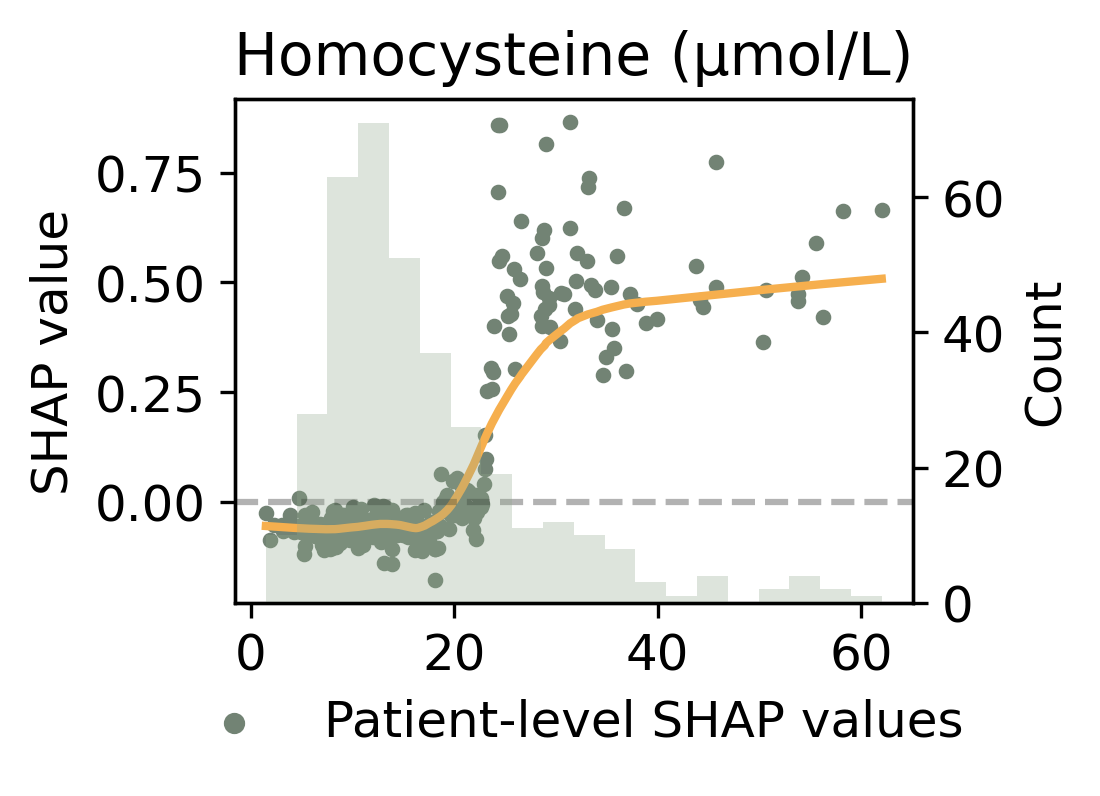

In [ ]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='Homocysteine',
    title_name='Homocysteine (μmol/L)',
    frac=0.3,
    lower_percentile=0,
    upper_percentile=99,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C", 
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)

